### Problem Statement
#### Consider only the below columns and prepare a prediction model for predicting Price.
- Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

- Model -- model of the car
- Price -- Offer Price in EUROs
- Age_08_04 -- Age in months as in August 2004
- KM -- Accumulated Kilometers on odometer
- HP -- Horse Power
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms

In [973]:
import warnings
warnings.filterwarnings('ignore')

In [975]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [977]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [979]:
raw_data = pd.read_csv("C:/Users/tusha/Downloads/MLR/MLR/ToyotaCorolla - MLR.csv",encoding='latin1')

In [981]:
raw_data.head(5)

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [983]:
print("Number of Rows {} Columns".format((raw_data.shape)))

Number of Rows (1436, 11) Columns


In [985]:
raw_data=raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Weight"]]
raw_data

Price  Age_08_04     KM   HP    cc  Doors  Gears  Weight
0     13500         23  46986   90  2000      3      5    1165
1     13750         23  72937   90  2000      3      5    1165
2     13950         24  41711   90  2000      3      5    1165
3     14950         26  48000   90  2000      3      5    1165
4     13750         30  38500   90  2000      3      5    1170
...     ...        ...    ...  ...   ...    ...    ...     ...
1431   7500         69  20544   86  1300      3      5    1025
1432  10845         72  19000   86  1300      3      5    1015
1433   8500         71  17016   86  1300      3      5    1015
1434   7250         70  16916   86  1300      3      5    1015
1435   6950         76      1  110  1600      5      5    1114

[1436 rows x 8 columns]

### Descriptive Analysis

In [988]:
raw_data.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears      Weight  
count  1436.000000  1436.000000  1436.00000  
mean      4.033426     5.026462  1072.45961  
std       0.952677     0.188510    52.64112  
min       2.000000     3.000000  1000.00000  
25%       3.000000     5.000000  1040.00000  
50%       4.000000     5.000000  1070.00000  
75%       5.000000     5.000000  1085.00000  
max       5.000000     6.000000  1615.00000

In [990]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   cc         1436 non-null   int64
 5   Doors      1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


### Observation: all the data types are correct .
### Renaming the columns name and making it short

In [993]:
data = raw_data.rename({"Age_08_04":"Age","cc":"CC"},axis=1)
data.head()

Price  Age     KM  HP    CC  Doors  Gears  Weight
0  13500   23  46986  90  2000      3      5    1165
1  13750   23  72937  90  2000      3      5    1165
2  13950   24  41711  90  2000      3      5    1165
3  14950   26  48000  90  2000      3      5    1165
4  13750   30  38500  90  2000      3      5    1170

In [995]:
data[data.values==0.0]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, Weight]
Index: []

### Observation: Notice there are no '0' values in the dataset

In [998]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
Weight    0
dtype: int64

### Visualizing Missing Values

<Axes: >

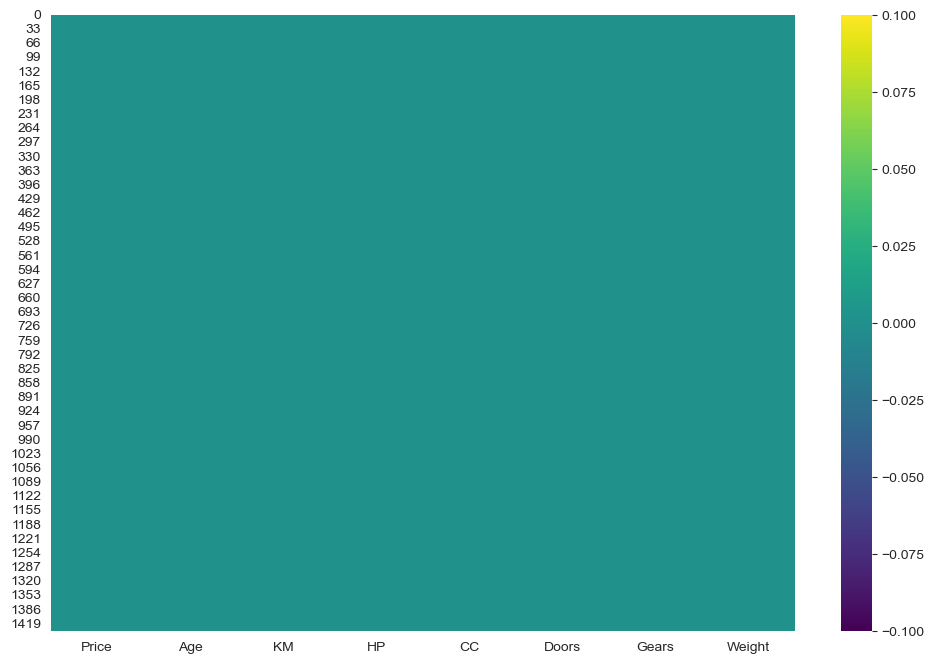

In [1001]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

In [1003]:
data[data.duplicated()].shape

(1, 8)

In [1005]:
data[data.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears  Weight
113  24950    8  13253  116  2000      5      5    1320

In [1007]:
data = data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, Weight]
Index: []

### Observation: There are duplicated values in the dataset
- Hence, we dropped those values

In [1010]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 4


### Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [1013]:
continous_feature = [feature for feature in data if data[feature].dtype !='O' and feature not in discrete_feature]
print('Continous Feature Count: {}'.format(len(continous_feature)))

Continous Feature Count: 4


### Exploratory Data Anlaysis
### Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [1016]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    data[feature].hist()
    plt.subplot(122)
    stats.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

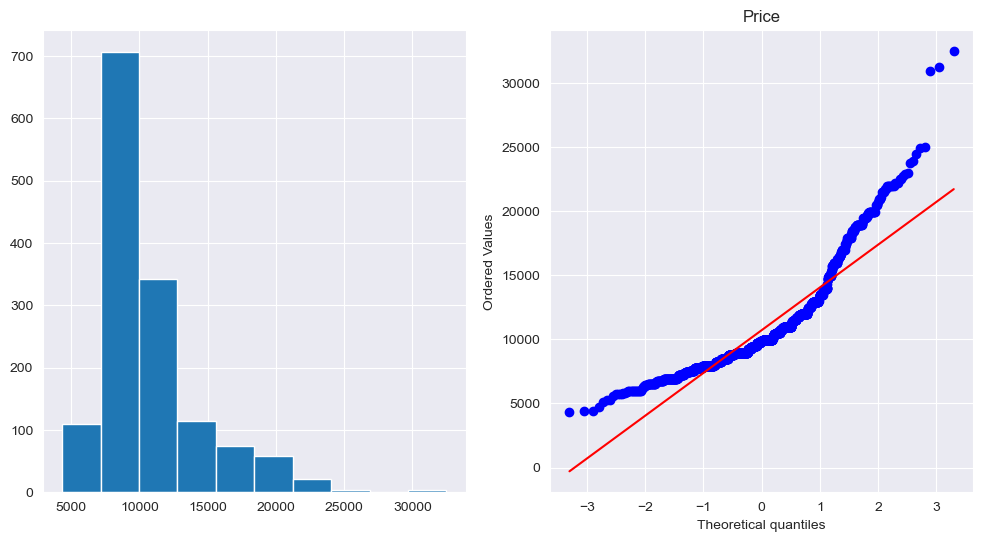

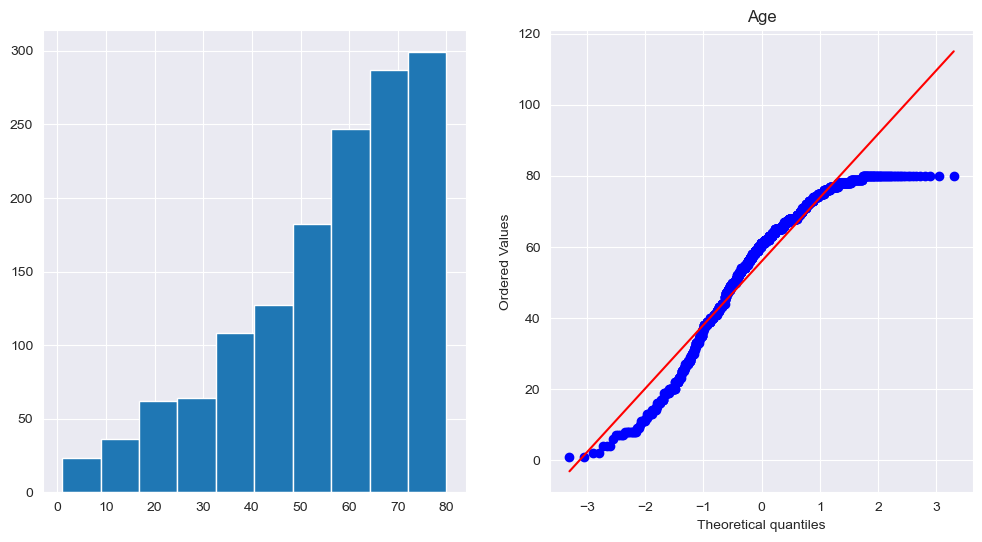

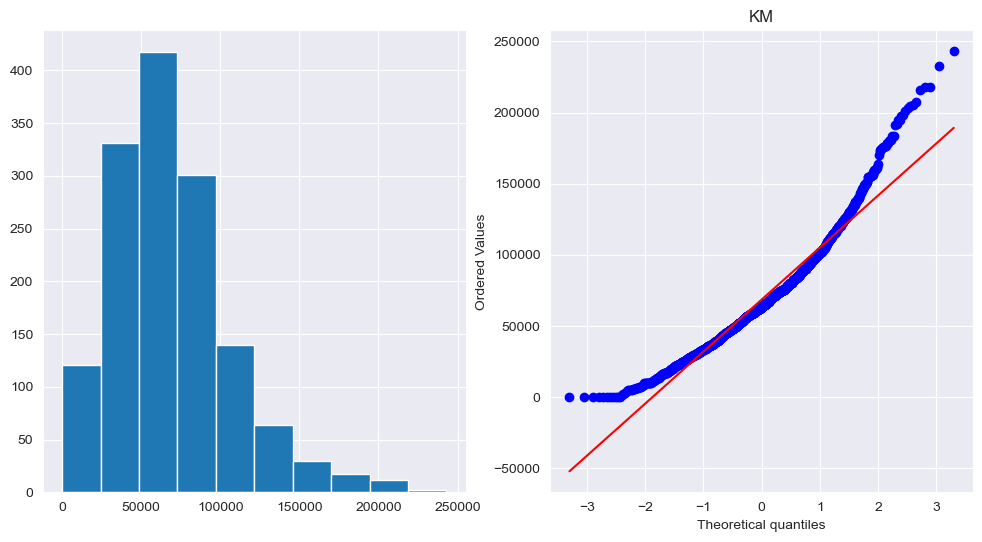

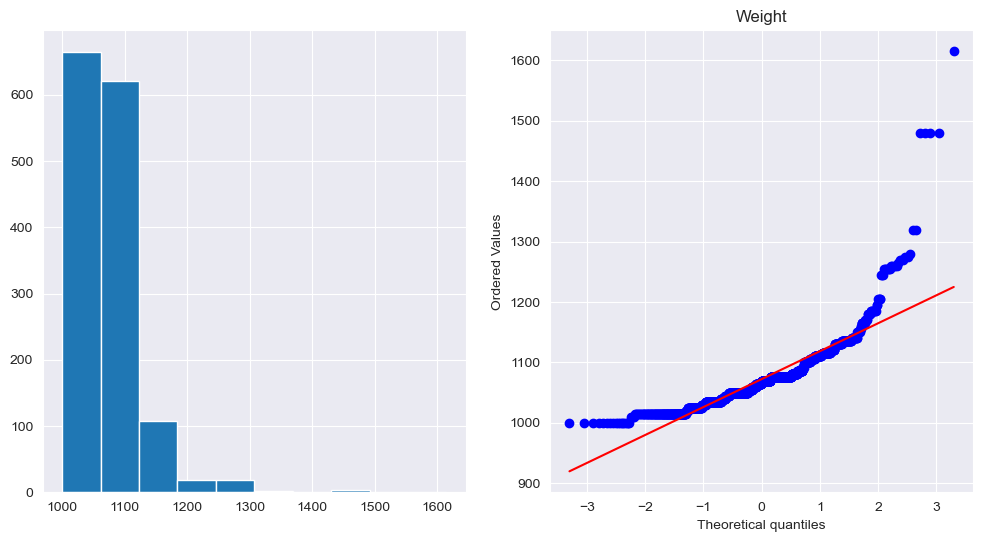

In [1018]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title("Age")
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title("Weight")

### Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

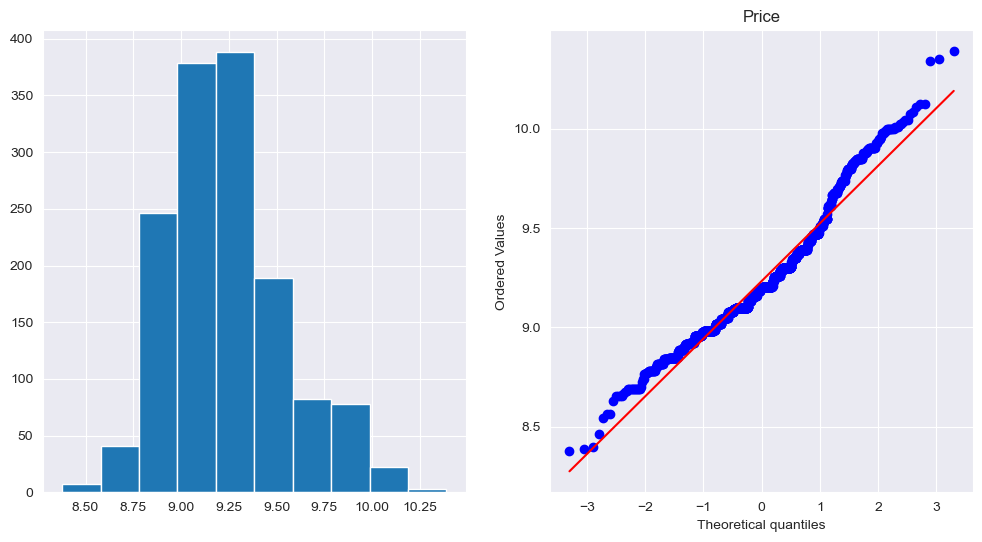

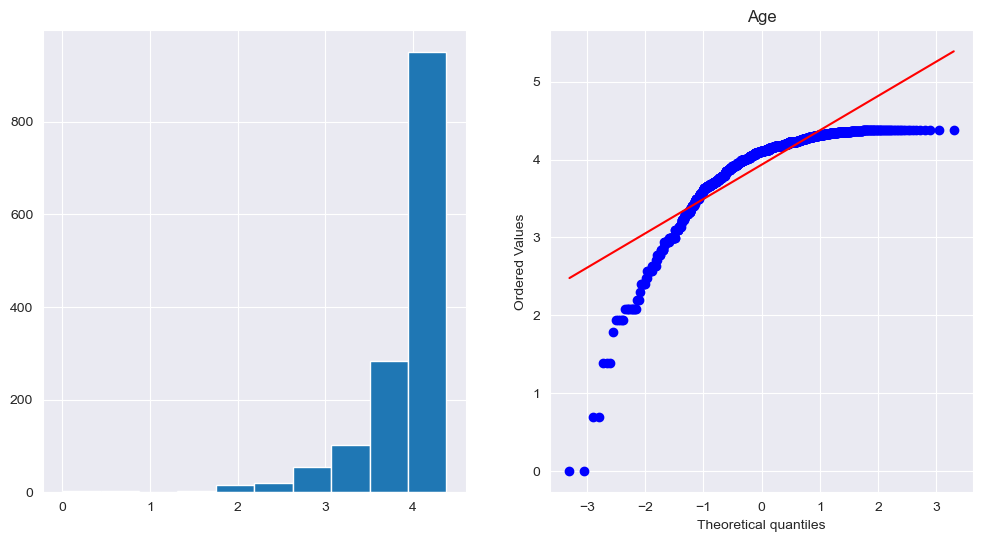

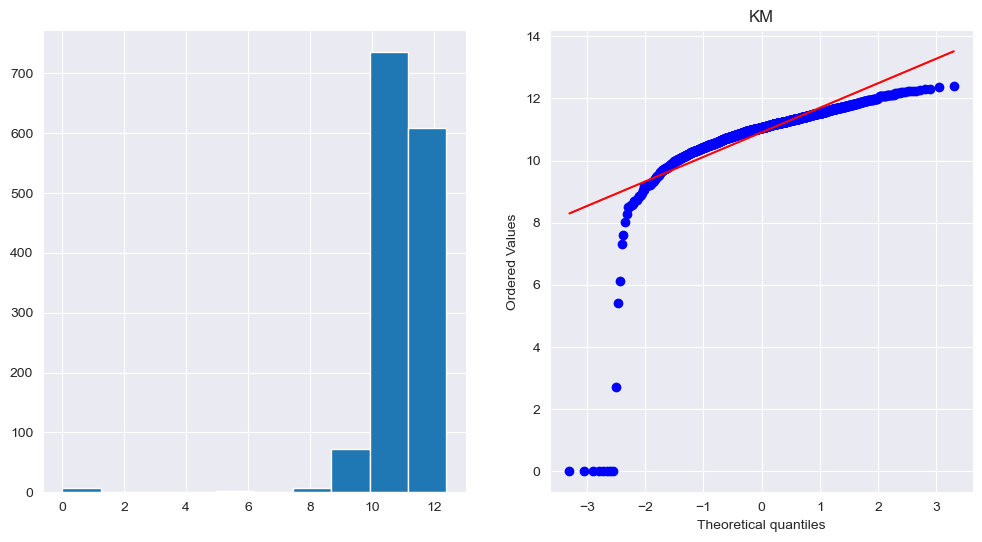

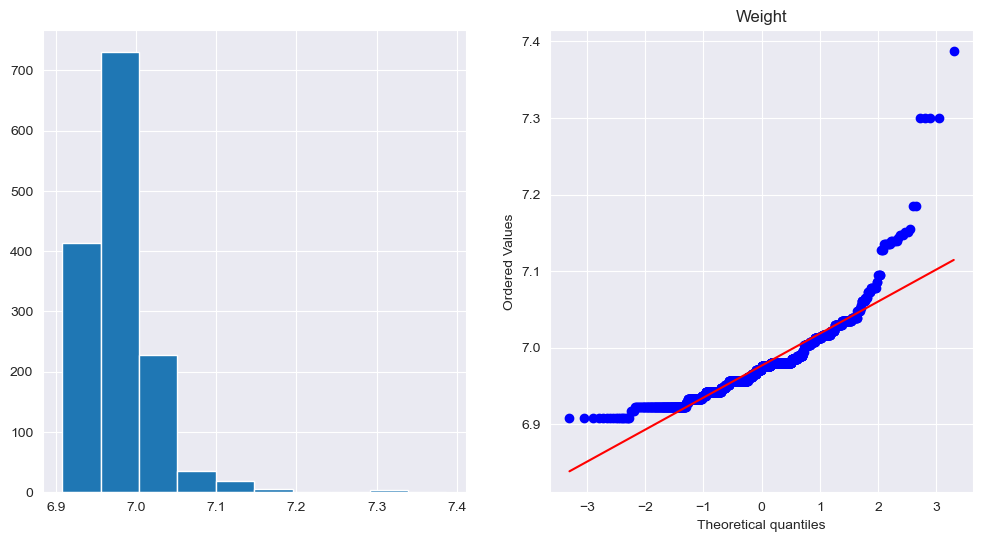

In [1020]:
df = data.copy()
df[continous_feature] = np.log(df[continous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

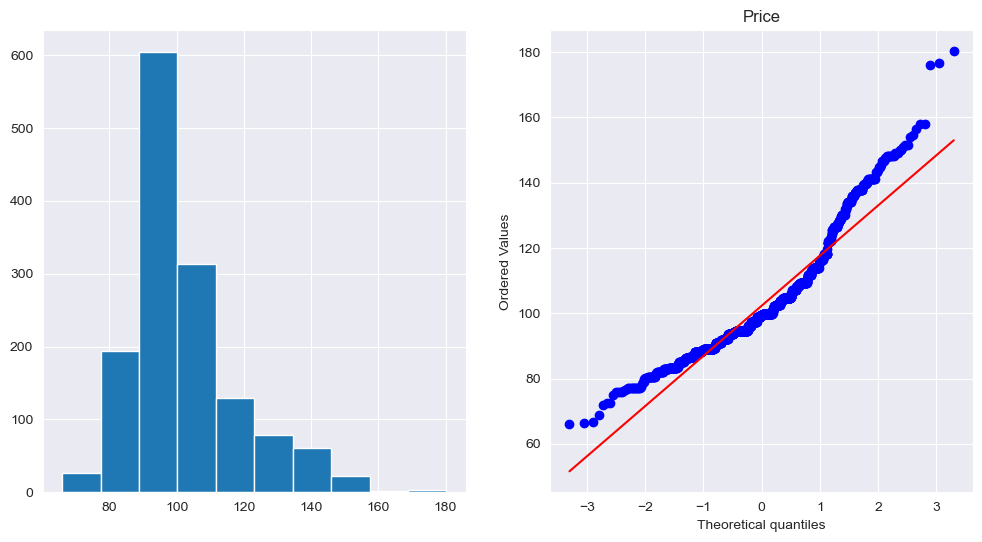

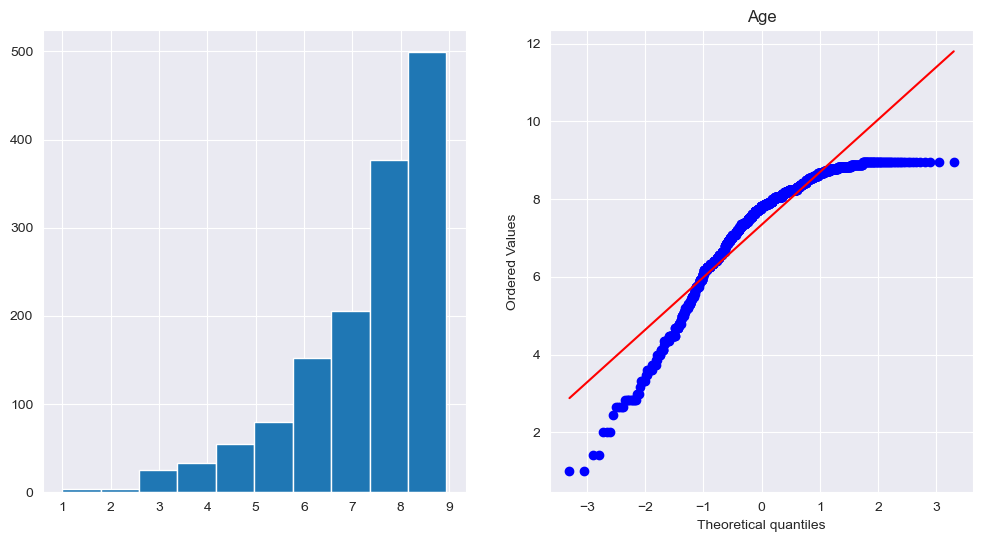

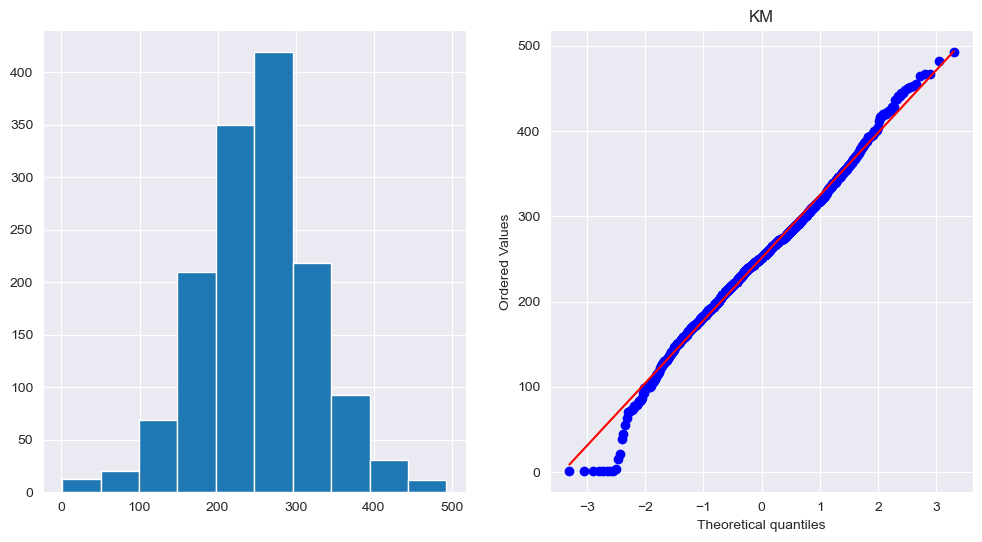

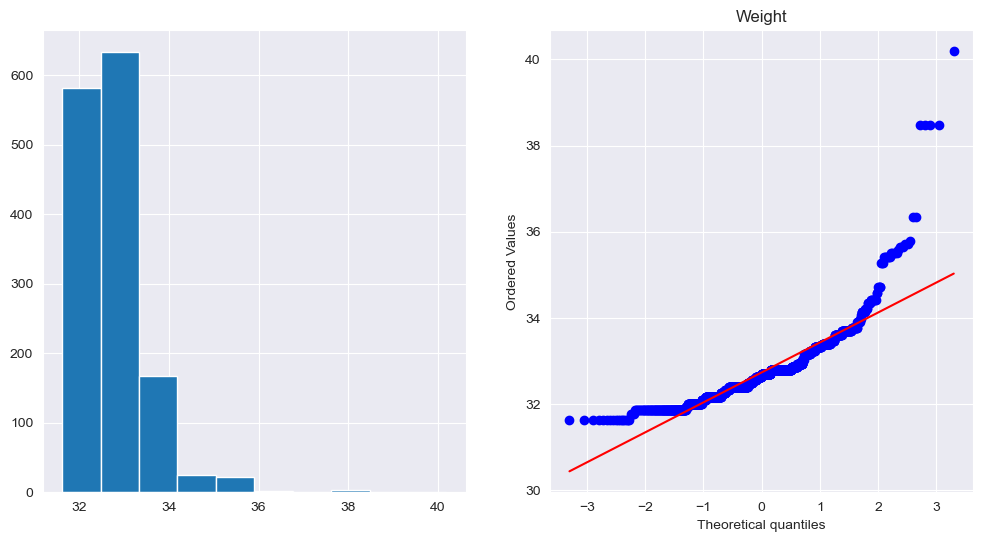

In [1022]:
df = data.copy()
df[continous_feature] = np.sqrt(df[continous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

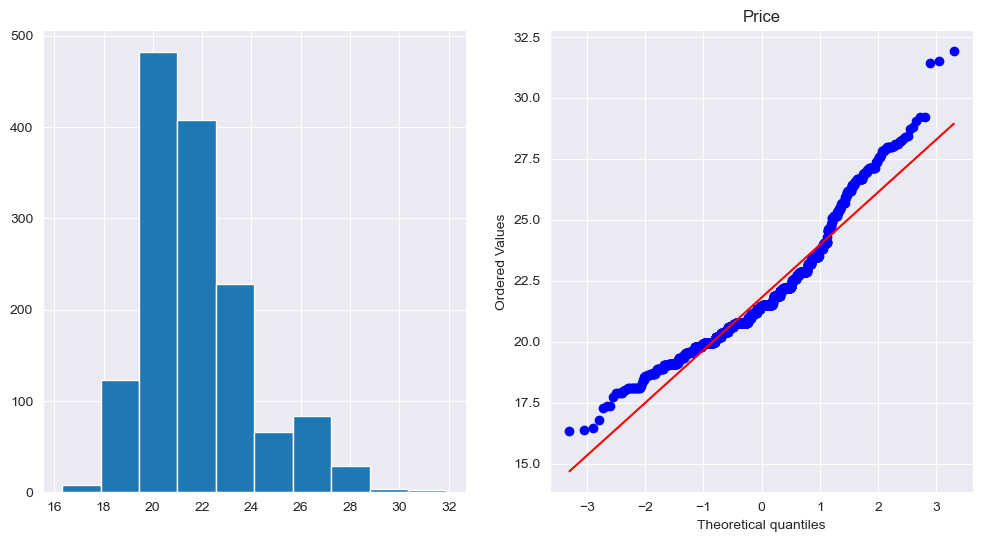

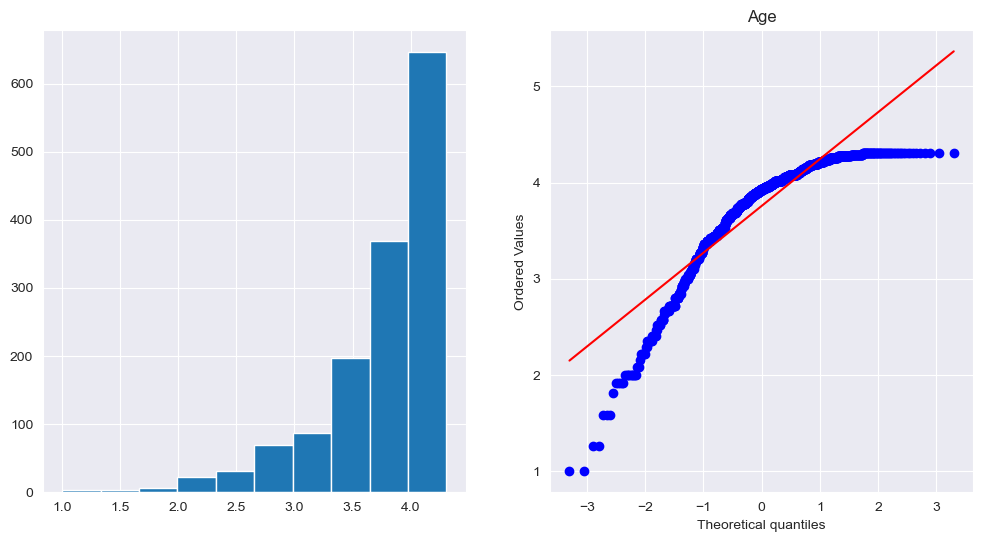

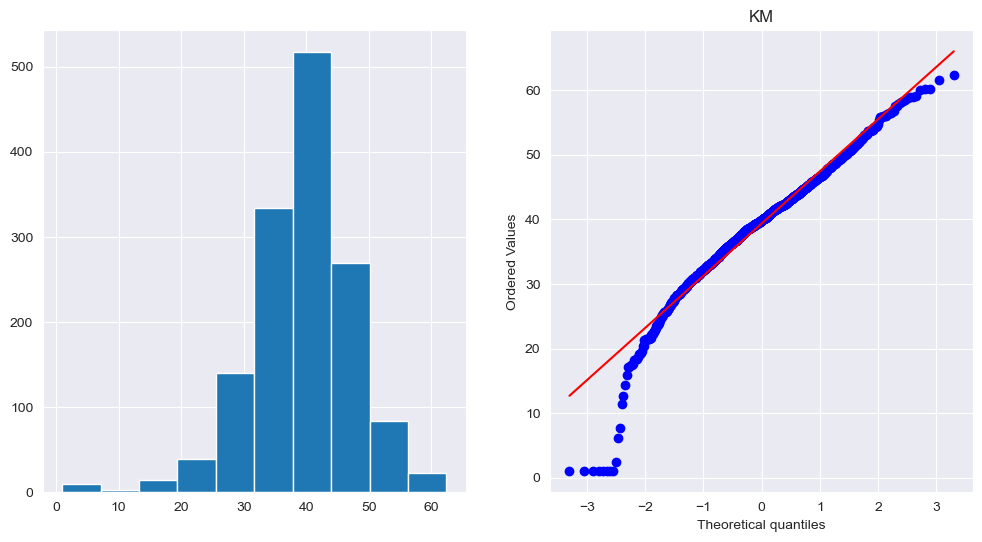

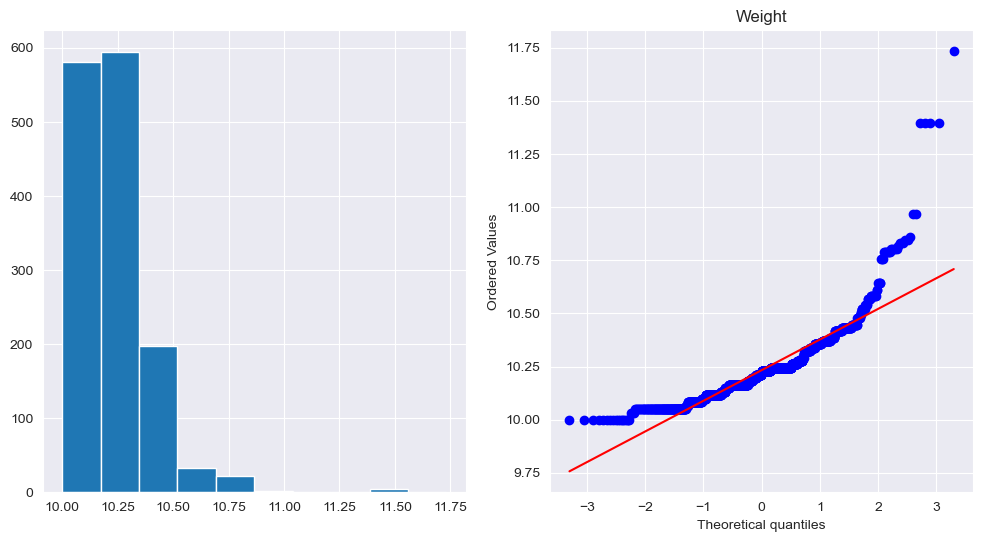

In [1024]:
df = data.copy()
df[continous_feature] = np.cbrt(df[continous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

- Note: Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.
### The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.
- To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [1026]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Weight'], dtype='object')

In [1028]:
from scipy.stats import shapiro

print('Price Feature',shapiro(data.Price),'\n'
     'Age Feature',shapiro(data.Age),'\n'
      'Weight Feature',shapiro(data.Weight),'\n'
      'KM Feature',shapiro(data.KM)
     )

Price Feature ShapiroResult(statistic=0.8534721682412996, pvalue=1.595778782735417e-34) 
Age Feature ShapiroResult(statistic=0.926695692395398, pvalue=6.73996815062802e-26) 
Weight Feature ShapiroResult(statistic=0.7825540643634167, pvalue=5.0427383782127665e-40) 
KM Feature ShapiroResult(statistic=0.947581681921263, pvalue=3.4417651852891183e-22)


### Observation: Since the p-values are less than .05, we reject the null hypothesis.
- We have sufficient evidence to say that the sample data does not come from a normal distribution.
### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

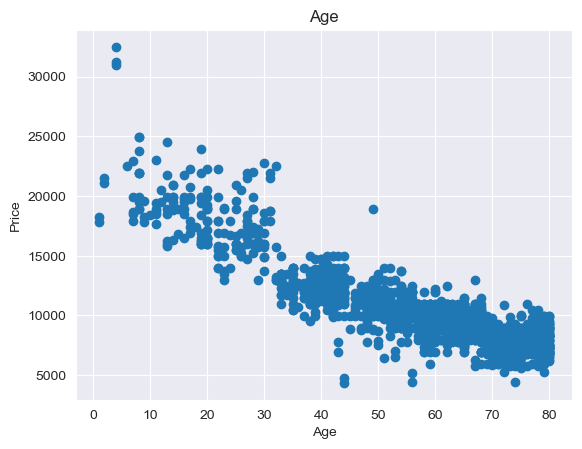

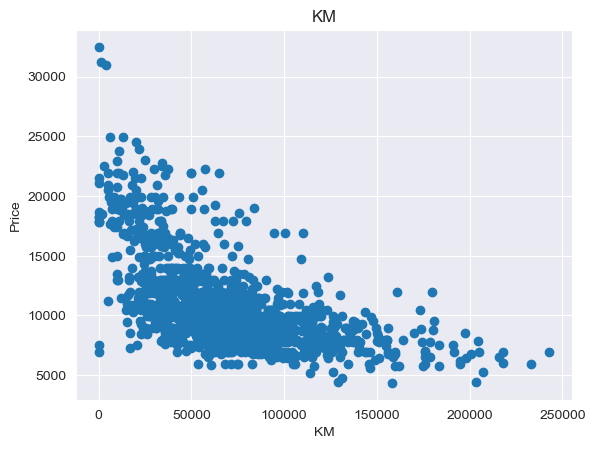

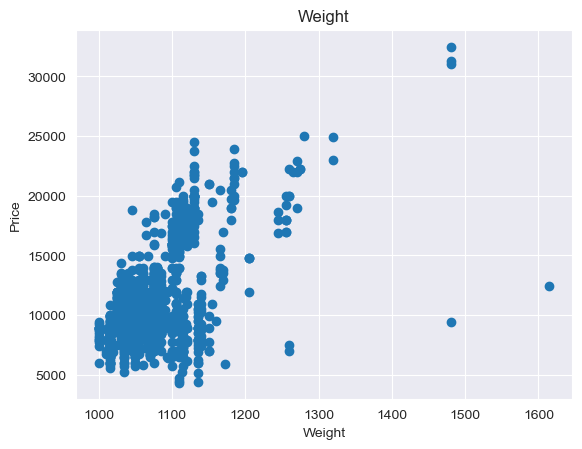

In [1030]:
for feature in continous_feature:
    if feature != 'Price':
        df = data.copy()
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

### Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features

### Lets analyze the relationship between the discrete variables and Price

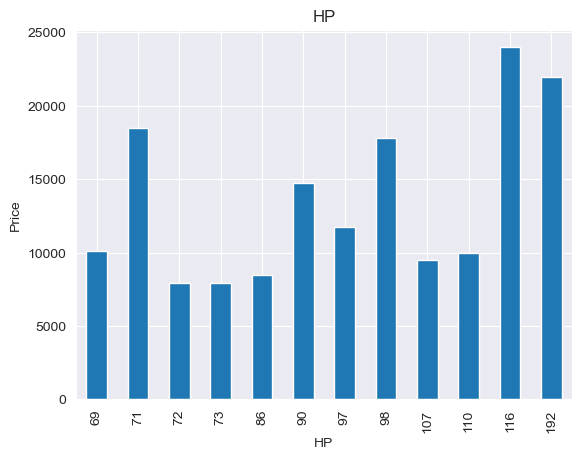

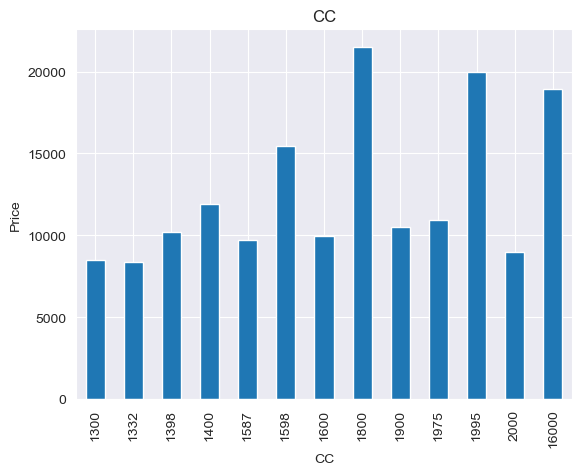

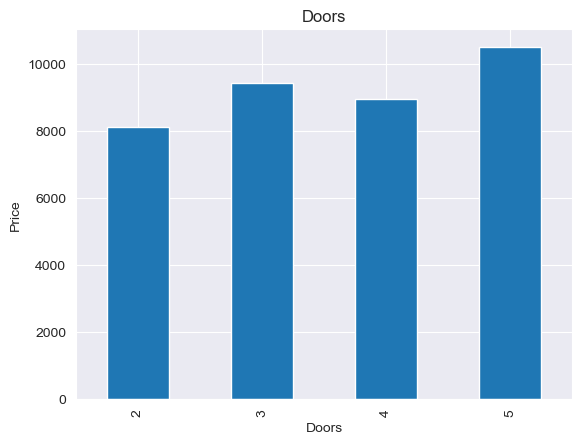

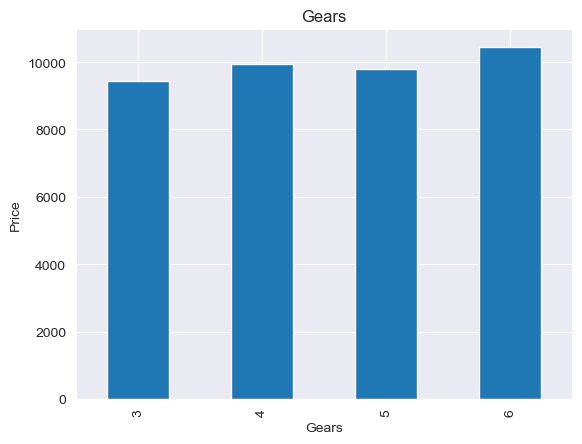

In [1032]:
for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

### Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation
### Checking the correlation between Variables

In [1034]:
data.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

          Weight  
Price   0.575869  
Age    -0.466484  
KM     -0.023969  
HP      0.087143  
CC      0.335077  
Doors   0.301734  
Gears   0.021238  
Weight  1.000000

<Axes: >

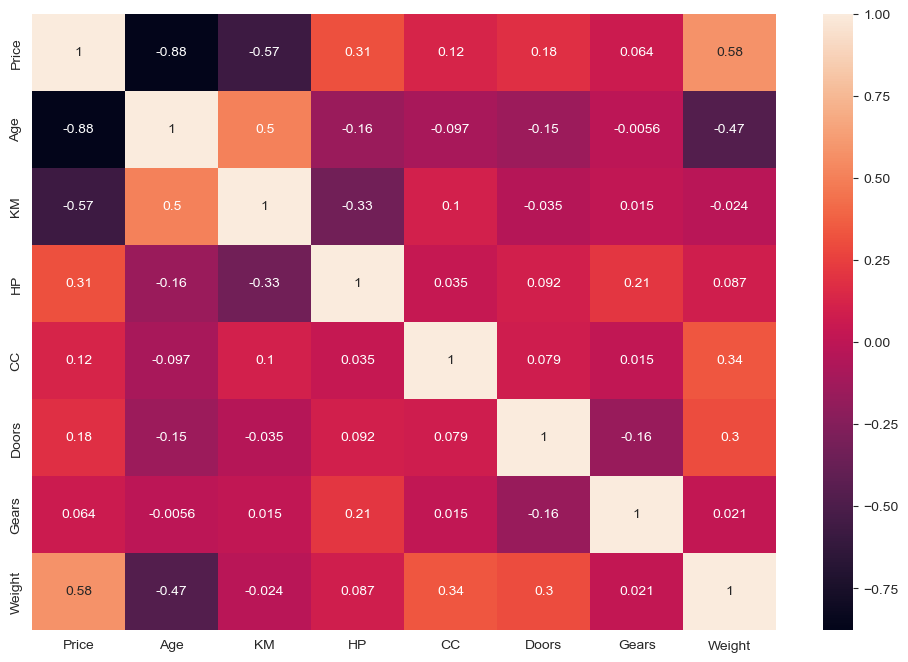

In [1036]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

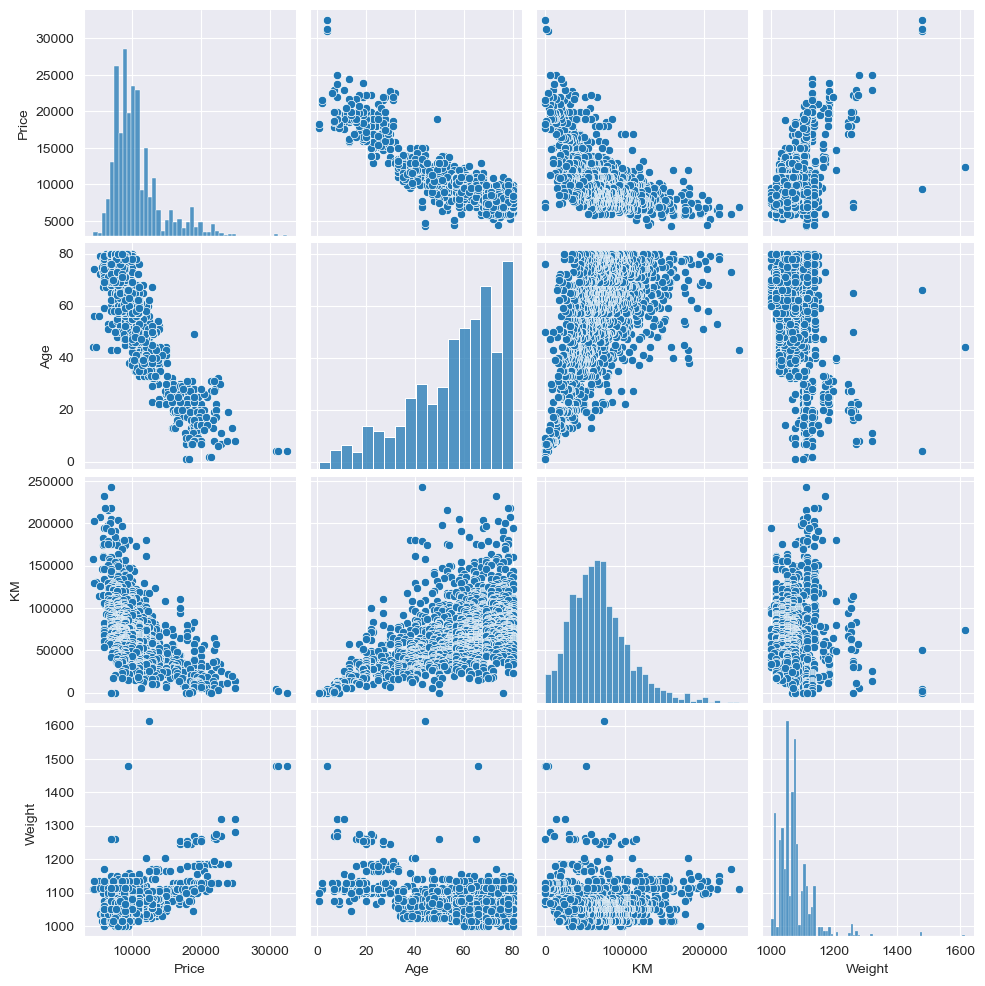

In [1038]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continous_feature])

### Observation : Age and KM has the highest score of correlation with Price but a neagtive correlation
- Note: QT and Weight also have collinearity among themselves which will affect our model.
- Note: KM and Age also has collinearity among themselves which will affect our model.

### Visualizing Continuous Datatype for Outlier Detection

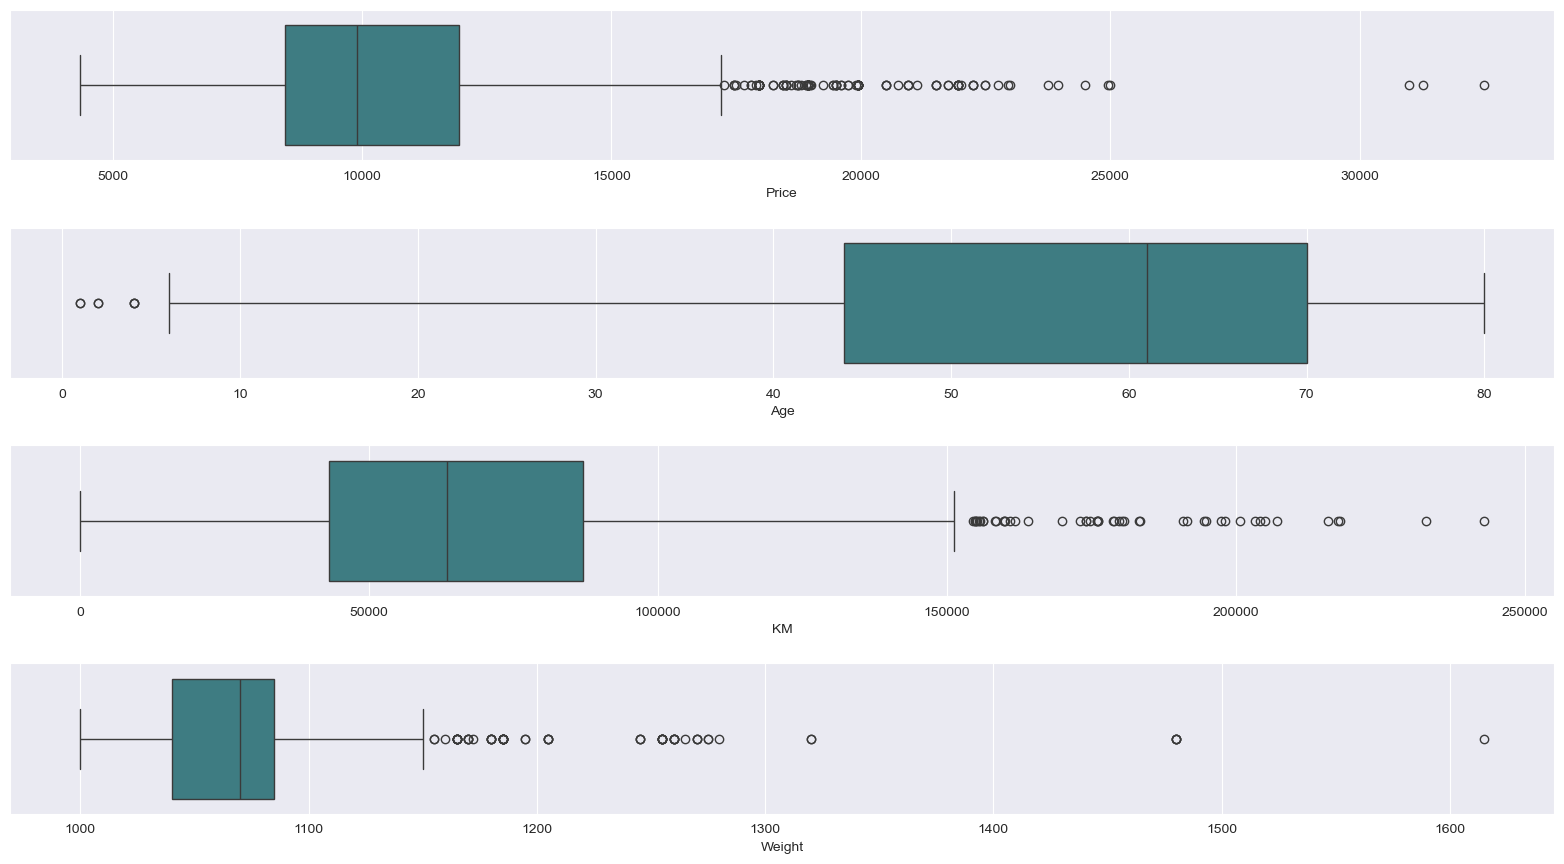

In [1040]:
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### Observation: A significant amount of outliers are present in each continuous feature
#### Note:

- We can't simply remove the outliers that would mean loss of information
- We need to try different types of transformation or imputation and select the one with the best results
- Note: Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values
### Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case
### Let's try Median Imputation to handle Outlier in Profit

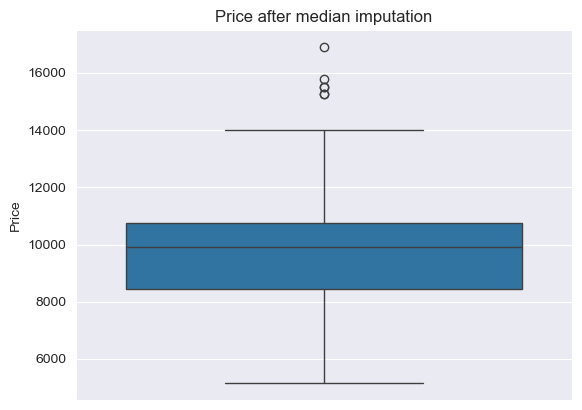

In [1042]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

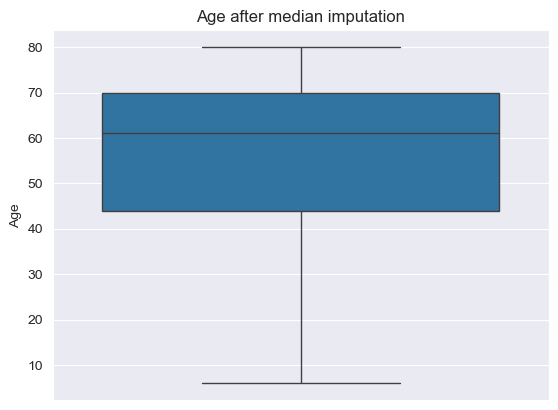

In [1044]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

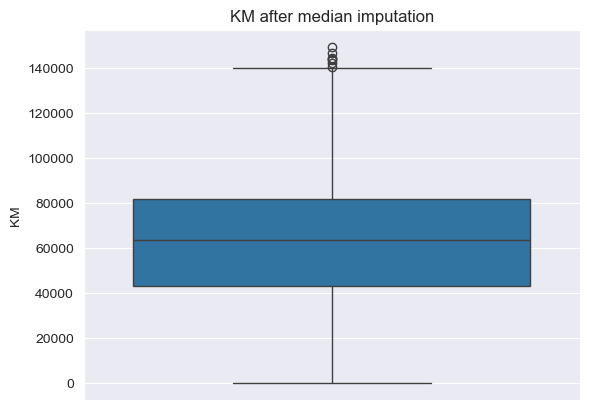

In [1046]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

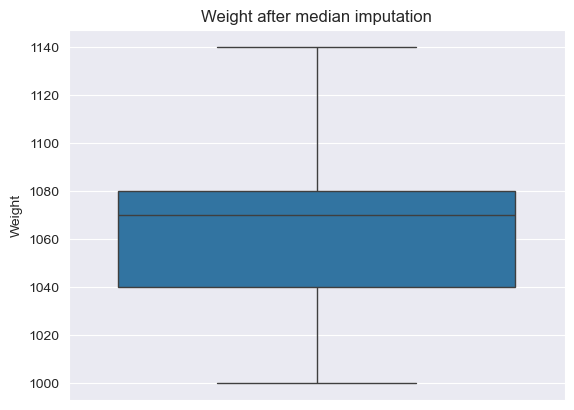

In [1048]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

### Let's test our data in model and find the R-squared with median imputation data model

In [1050]:
after_median_imputation_model = smf.ols('Price~Age+KM+Weight',data=df1).fit()
after_median_imputation_model.rsquared,after_median_imputation_model.rsquared_adj

(0.34204996085646155, 0.3406706106695778)

### Let's try Mean Imputation to handle Outlier in Profit

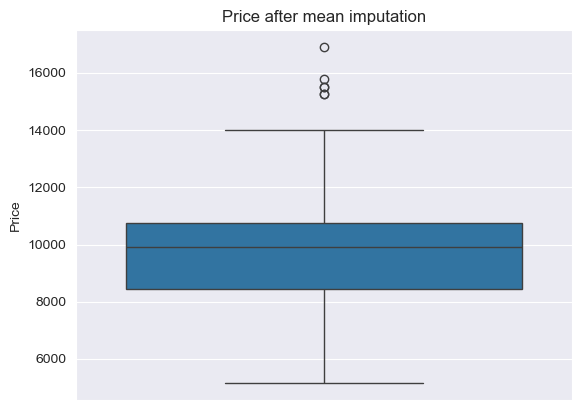

In [1052]:
df2 = data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = df2['Price'].median()
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    if i < lower_bound or i > upper_bound:
        df2['Price'] = df1['Price'].replace(i,df2['Price'].median())
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

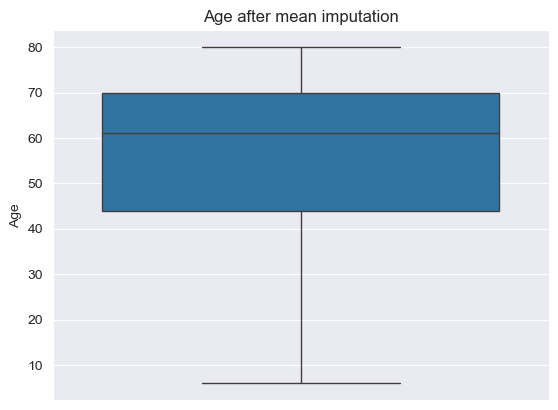

In [1054]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

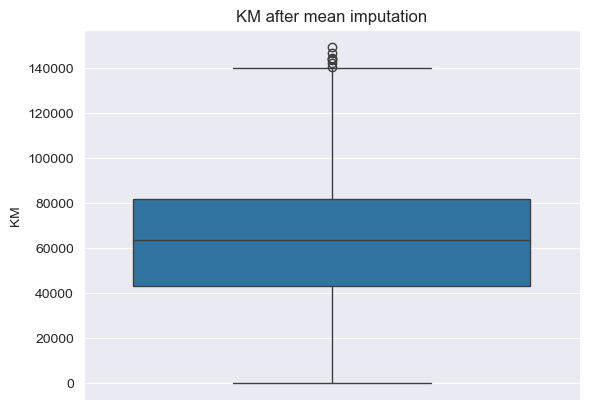

In [1056]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

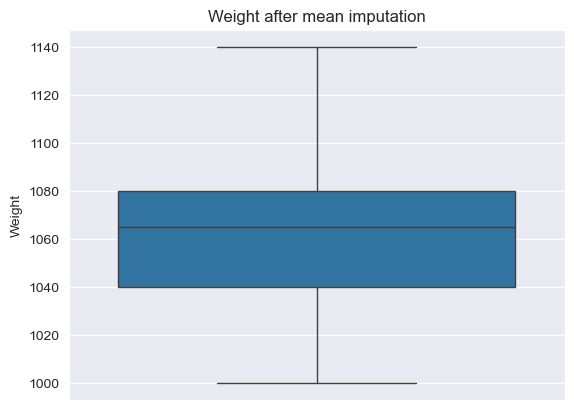

In [1058]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

### Let's test our data in model and find the R-squared with mean imputation data model

In [1060]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.3426073583936887, 0.3412291767551011)

#### Observation: As we can see even after mean imputation the model is not performing well
### The best thing we can do now is to remove the outlier and see the results

In [1062]:
df3 = data.copy()
def drop_outlier(data,feature):
    iqr = 1.5*(np.percentile(data[feature],75)-np.percentile(data[feature],25))
    data.drop(data[data[feature]>iqr+np.percentile(data[feature],75)].index)
    data.drop(data[data[feature]<iqr-np.percentile(data[feature],25)].index)

Text(0.5, 1.0, 'Price after removing outliers')

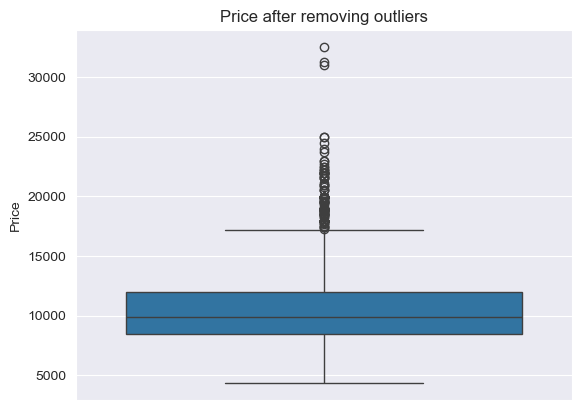

In [1064]:
drop_outlier(df3,'Price')
sns.boxplot(df3['Price'])
plt.title("Price after removing outliers")

Text(0.5, 1.0, 'Age after removing outliers')

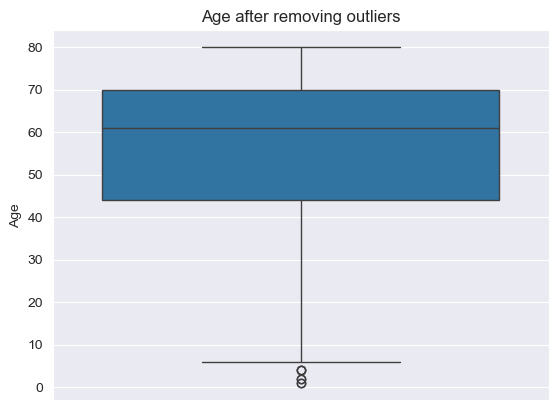

In [1066]:
drop_outlier(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

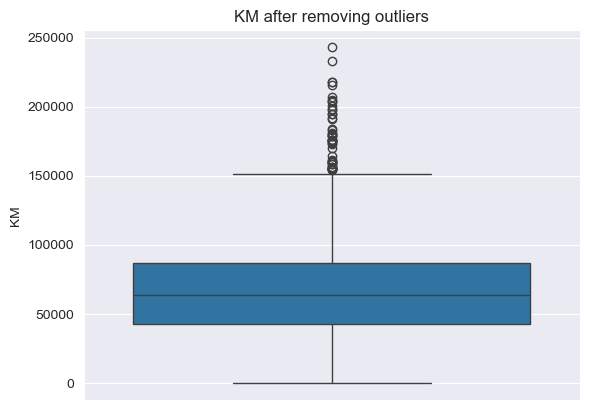

In [1068]:
drop_outlier(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

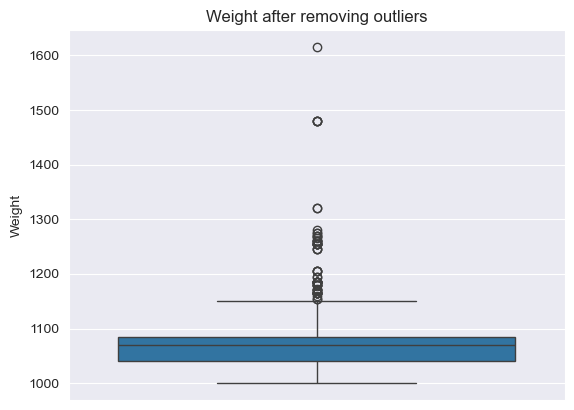

In [1070]:
drop_outlier(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers')

#### Let's test our data in model and compare the R-squared with without imputation data model

In [1073]:
removed_outlier_model = smf.ols('Price~Age+KM+Weight',data=df3).fit()
removed_outlier_model.rsquared, removed_outlier_model.rsquared_adj

(0.8467399730874641, 0.8464186732406873)

In [1075]:
np.sqrt(removed_outlier_model.mse_resid)

1414.242733320169

### Let's try log transformation and visualize the result first

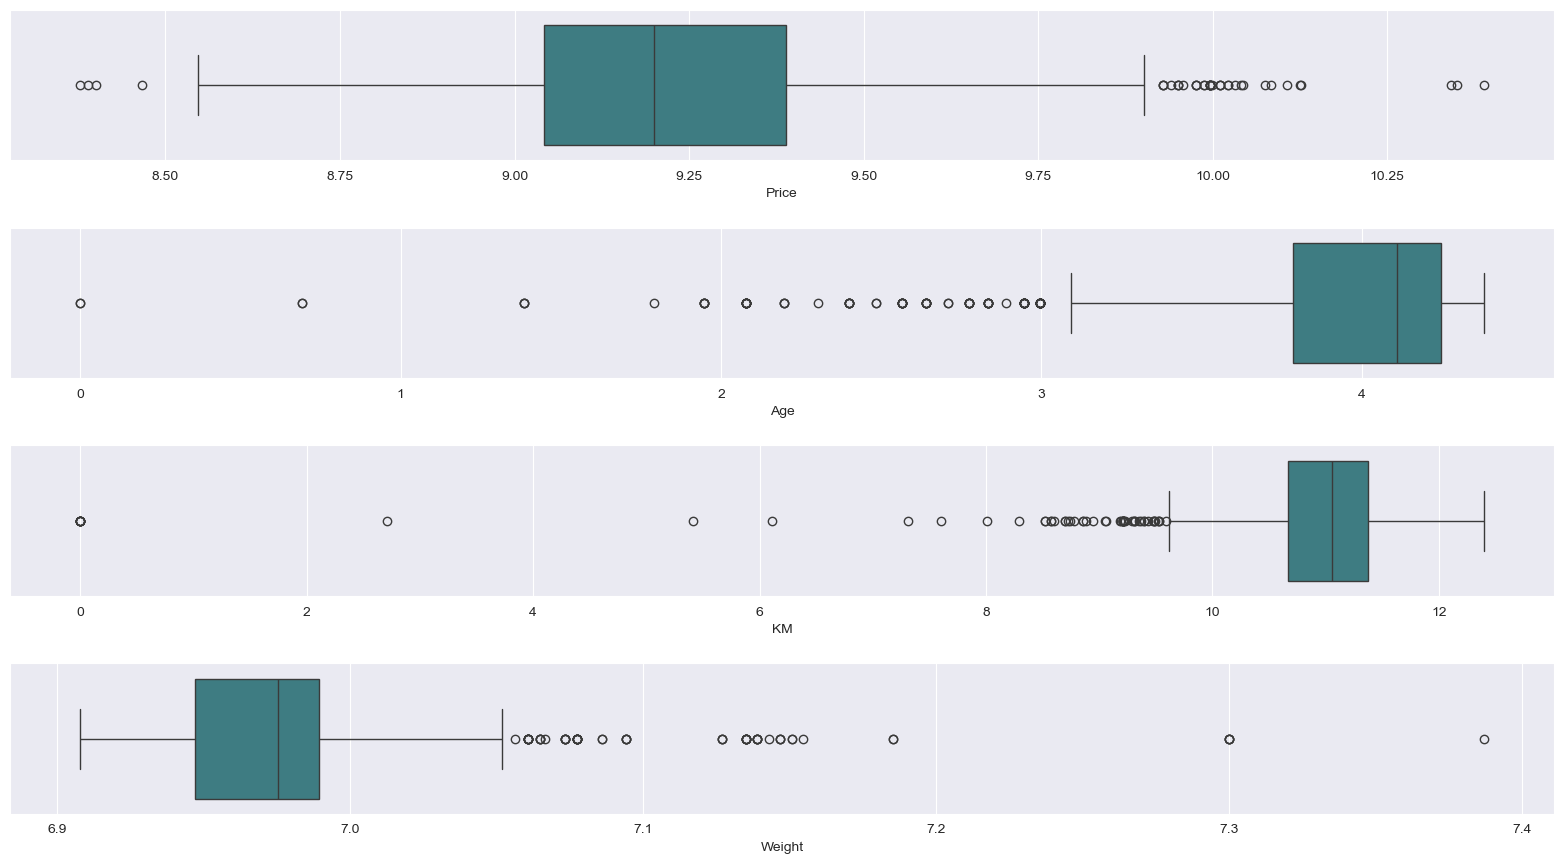

In [1078]:
df=data.copy()
df[continous_feature]=np.log(df[continous_feature])
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [1080]:
log_transformed = data.copy()
log_transformed[continous_feature] = np.log(log_transformed[continous_feature])
log_transformed_model = smf.ols('Price~Age+KM+Weight',data=log_transformed).fit()
log_transformed_model.rsquared, log_transformed_model.rsquared_adj

(0.7069873404282617, 0.7063730581230798)

### Observation: The outliers are still present
### Let's try cuberoot transformation and visualize the result first

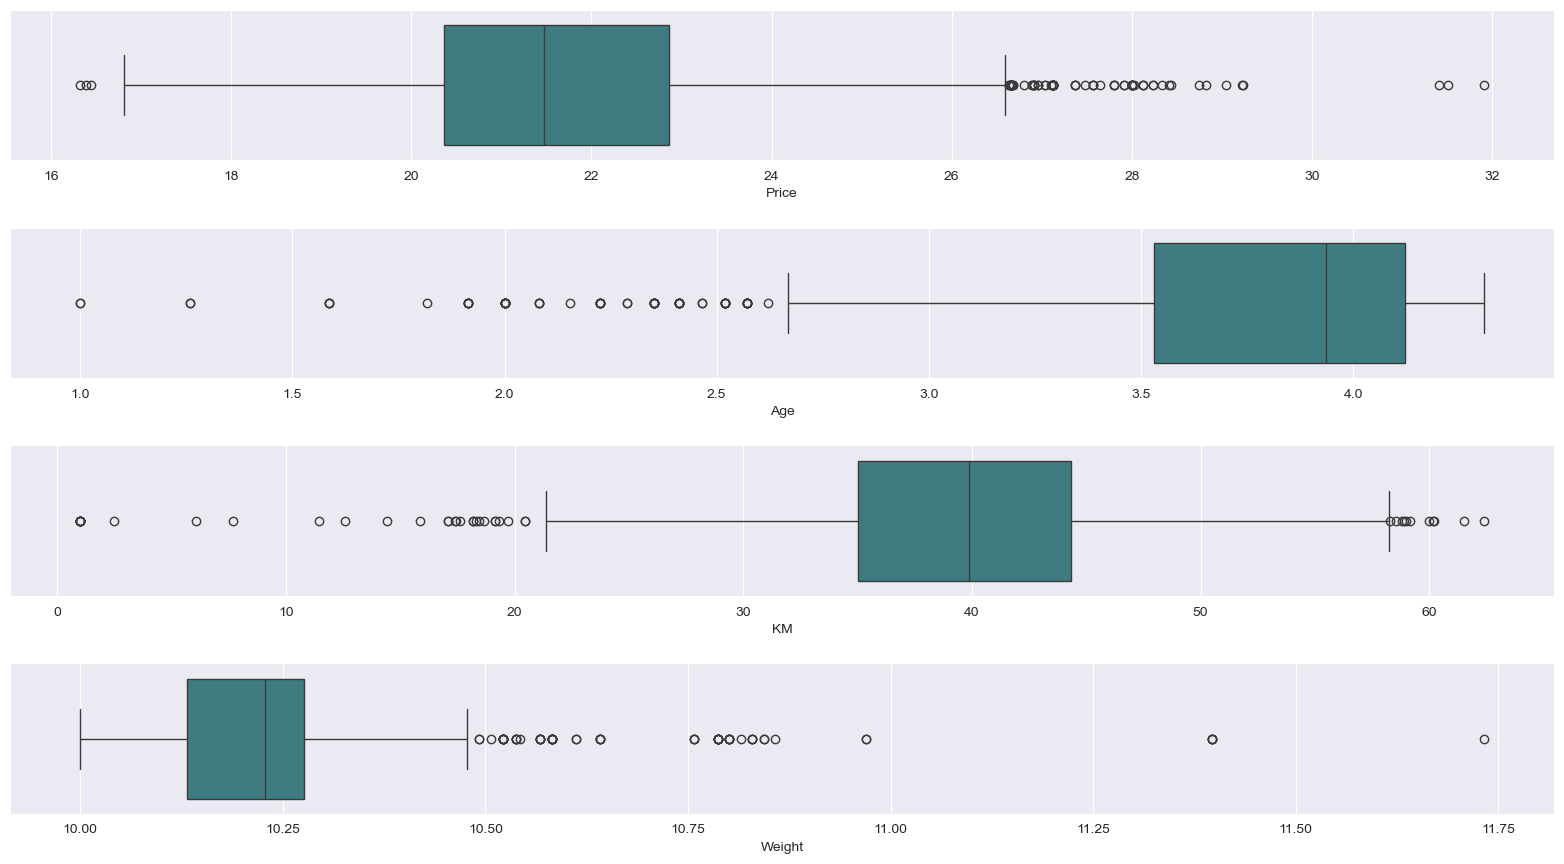

In [1082]:
df = data.copy()
df[continous_feature] = np.cbrt(df[continous_feature])

fig, axes = plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [1084]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continous_feature]=np.cbrt(cube_root_transfomed[continous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj

(0.8146046800585908, 0.8142160106247514)

### Observation: The outliers are still present
### Observation: After removing Outliers the model performed very poorly than the raw data model
- Note: We will continue with different technique to deal with that
### Raw Data Model

In [1086]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Weight'], dtype='object')

In [1088]:
raw_data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight'], dtype='object')

In [1090]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1270.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:46:45   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6969.4756   1321.000     -5.276      0.000   -9560.786   -4378.165
Age         -122.2804      2.614    -46.770      0.000    -127.409    -117.152
KM            -0.0198      0.001    -16.295      0.000      -0.022      -0.017
Weight        18.6955      0.870     21.484      0.000      16.988      20.402
HP            28.4558      2.617     10.875      0.000      23.323      33.588
CC            -0.0862      0.090     -0.962      0.336      -0.262       0.090
Gears        623.4506    197.303      3.160      0.002     236.415    1010.486
Doors         -9.7001     39.984     -0.243      0.808     -88.134      68.733
==============================================================================
Omnibus:                      200.969   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.264
Skew:                          -0.379   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1092]:
np.sqrt(raw_data_model.mse_resid)

1345.405029869193

### Detecting Influencers/Outliers in the Model
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [1094]:
influence_points = raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

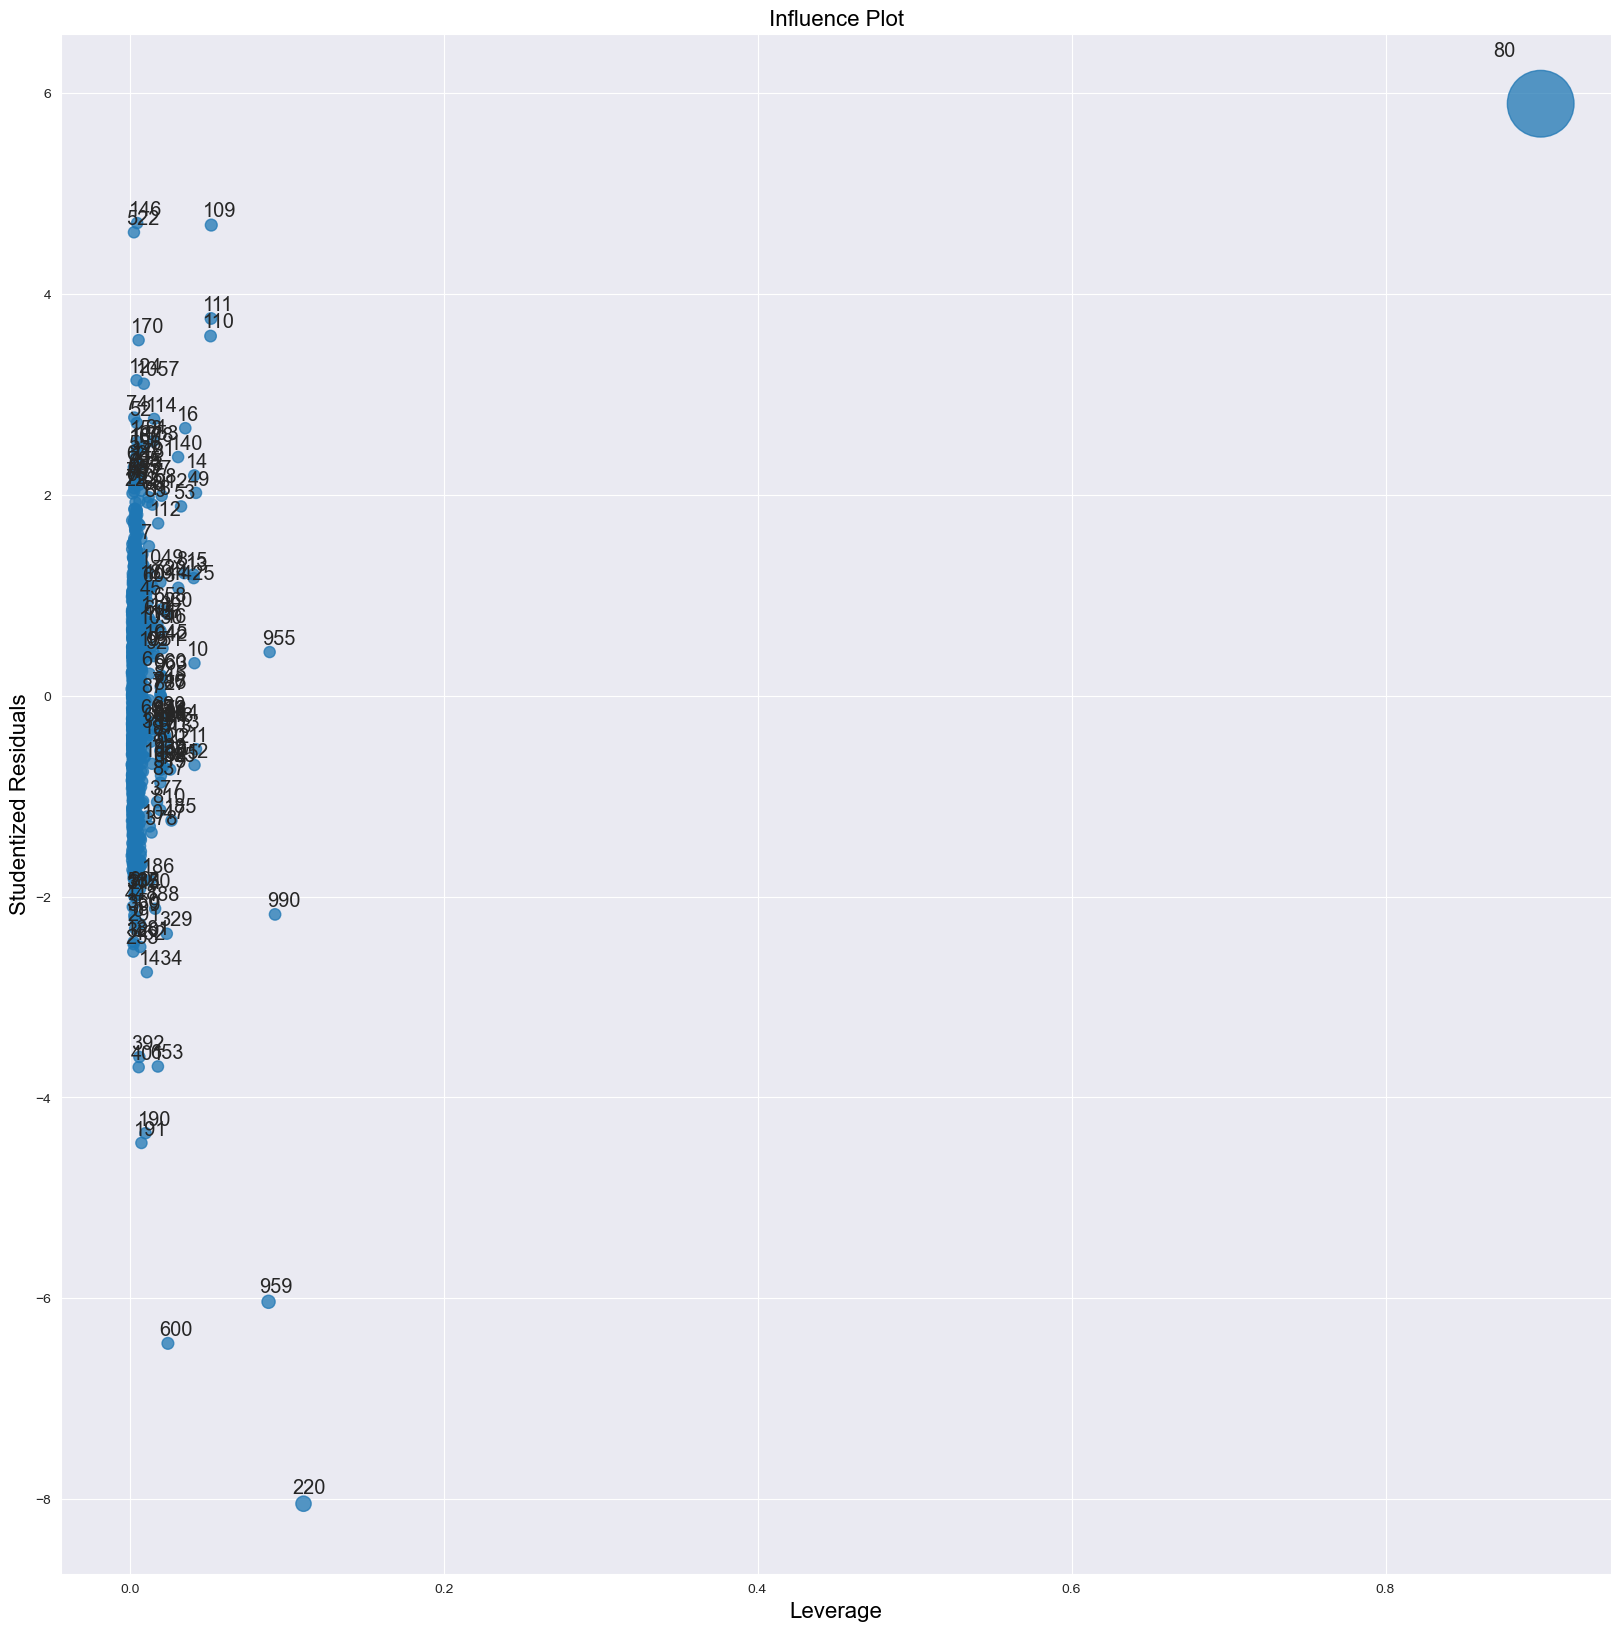

In [1096]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [1097]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


### Let's plot the influencers and also plot a cut off line using the stem plot

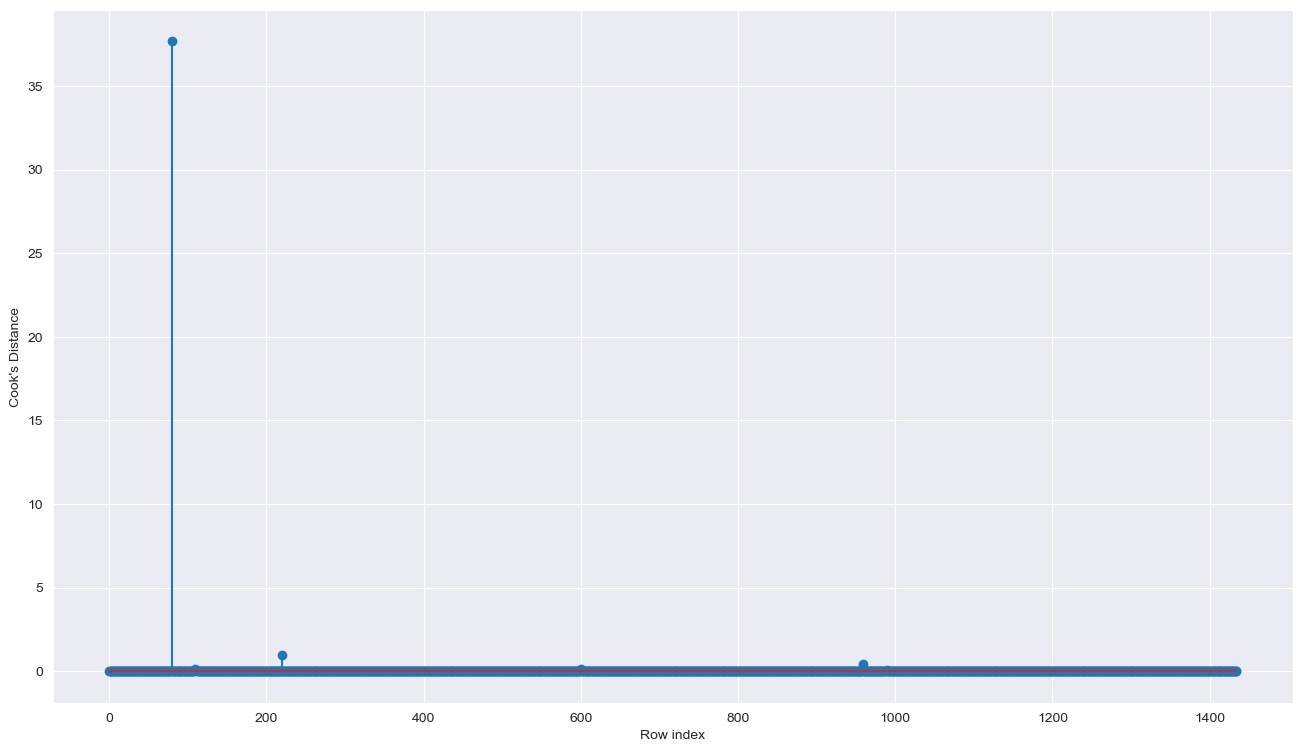

In [1100]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [1102]:
# Index and value of influencer where c > 0.5
np.argmax(c), np.max(c)

(80, 37.67938803262689)

In [ ]:
data[data.index.isin([80])]

### Let's improve the model by deleting the influence point and creating a new dataframe

In [1104]:
dataframe = data.copy()
dataframe = dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

Price  Age     KM  HP    CC  Doors  Gears  Weight
0  13500   23  46986  90  2000      3      5    1165
1  13750   23  72937  90  2000      3      5    1165
2  13950   24  41711  90  2000      3      5    1165
3  14950   26  48000  90  2000      3      5    1165
4  13750   30  38500  90  2000      3      5    1170

In [1106]:
data.shape

(1435, 8)

### Model Deletion Diagnostics and Final Model

In [1108]:
# Another Method
k = dataframe.shape[1]
n = dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)> leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight',data=dataframe).fit()
    (c,_) = model.get_influence().cooks_distance 
    # c = model.get_influence().cooks_distance[0]
    c
    np.argmax(c),np.max(c)
    dataframe = dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight',data=dataframe).fit()
    final_model.rsquared, final_model.aic
    print("Thus the model accuracy is improved to",final_model.rsquared)


Thus the model accuracy is improved to 0.8903225592560308


In [1110]:
while model.rsquared < 0.89:
    for c in [np.max(c)>leverage_cutoff]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight',data=dataframe).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8913962001227942


In [1112]:
influence_points = final_model.get_influence()
c,p_value = influence_points.cooks_distance

In [1114]:
dataframe.shape

(1419, 8)

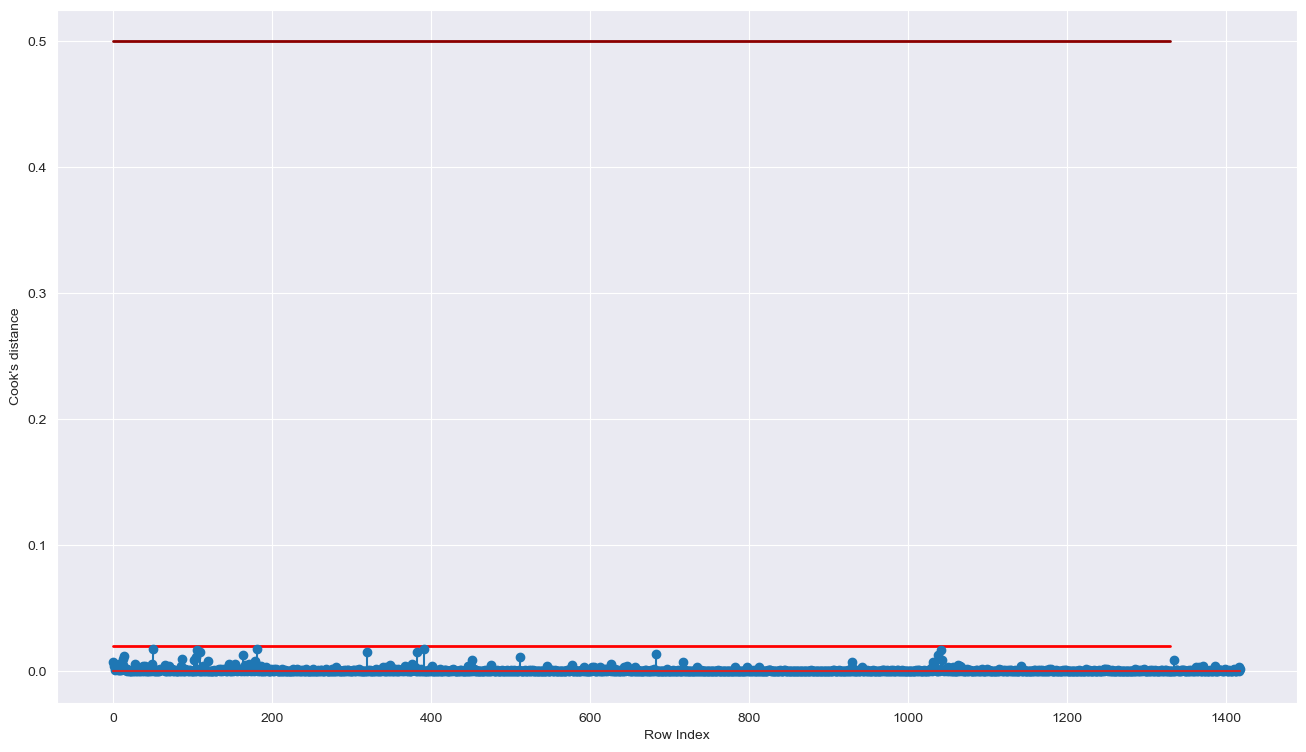

In [1116]:
fig = plt.figure(figsize=(16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x,y,color='darkred',linewidth=2)
y1 = [0.02,0.02]
plt.plot(x,y1,color='red',linewidth=2)
plt.stem(np.arange(len(dataframe)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cook\'s distance')
plt.show()

#### Observation: All the points are below our cut-off line
- Hence, we can say that there are no influncers present in our model we can proceed with the predictions

In [1118]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:47:30   Log-Likelihood:                -12012.
No. Observations:                1419   AIC:                         2.404e+04
Df Residuals:                    1411   BIC:                         2.408e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.586e+04   1345.459    -11.791      0.000   -1.85e+04   -1.32e+04
Age         -109.5243      2.369    -46.237      0.000    -114.171    -104.878
KM            -0.0175      0.001    -15.457      0.000      -0.020      -0.015
HP            26.8231      2.401     11.170      0.000      22.112      31.534
CC            -3.2783      0.268    -12.212      0.000      -3.805      -2.752
Doors       -149.3150     35.593     -4.195      0.000    -219.136     -79.494
Gears        238.1701    181.552      1.312      0.190    -117.970     594.310
Weight        33.3559      1.191     28.000      0.000      31.019      35.693
==============================================================================
Omnibus:                       44.052   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.397
Skew:                           0.208   Prob(JB):                     4.71e-19
Kurtosis:                       4.120   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1120]:
np.sqrt(final_model.mse_resid)

1151.3546775290008

### Feature Engineering
#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
#### Log-Transformation

In [1122]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

Age     Price         KM    Weight    CC  Doors  HP
0  3.135494  9.510445  10.757605  7.060476  2000      3  90
1  3.135494  9.528794  11.197351  7.060476  2000      3  90
2  3.178054  9.543235  10.638520  7.060476  2000      3  90
3  3.258097  9.612467  10.778956  7.060476  2000      3  90
4  3.401197  9.528794  10.558414  7.064759  2000      3  90

In [1124]:
log_transformed_model = smf.ols('Price~Age+KM+Weight+CC+Doors+HP',data=df_log_scaled).fit()

In [1126]:
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     735.1
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:47:42   Log-Likelihood:                 755.10
No. Observations:                1419   AIC:                            -1496.
Df Residuals:                    1412   BIC:                            -1459.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3816      1.245     -1.913      0.056      -4.824       0.060
Age           -0.4103      0.014    -30.155      0.000      -0.437      -0.384
KM             0.0115      0.006      1.913      0.056      -0.000       0.023
Weight         1.8834      0.182     10.344      0.000       1.526       2.241
CC            -0.0003    3.3e-05     -7.717      0.000      -0.000      -0.000
Doors         -0.0013      0.004     -0.308      0.758      -0.010       0.007
HP             0.0037      0.000     13.419      0.000       0.003       0.004
==============================================================================
Omnibus:                      337.117   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1384.910
Skew:                          -1.083   Prob(JB):                    1.86e-301
Kurtosis:                       7.328   Cond. No.                     5.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Cube-Root Transformation

In [1128]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']

df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

Age      Price         KM     Weight    CC  Doors  Gears  HP
0  2.843867  23.811016  36.084677  10.522251  2000      3      5  90
1  2.843867  23.957099  41.781366  10.522251  2000      3      5  90
2  2.884499  24.072696  34.680355  10.522251  2000      3      5  90
3  2.962496  24.634688  36.342412  10.522251  2000      3      5  90
4  3.107233  23.957099  33.766567  10.537282  2000      3      5  90

In [1130]:
cbrt_transformed_model = smf.ols('Price~Age+KM+Weight+CC+Doors+HP',data=df_cbrt_scaled).fit()
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1341.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:47:48   Log-Likelihood:                -1767.0
No. Observations:                1419   AIC:                             3548.
Df Residuals:                    1412   BIC:                             3585.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0958      2.980     -3.387      0.001     -15.942      -4.249
Age           -2.5809      0.071    -36.185      0.000      -2.721      -2.441
KM            -0.0467      0.004    -11.157      0.000      -0.055      -0.039
Weight         4.2473      0.302     14.070      0.000       3.655       4.839
CC            -0.0012      0.000     -6.140      0.000      -0.002      -0.001
Doors         -0.0218      0.026     -0.846      0.397      -0.072       0.029
HP             0.0199      0.002     11.909      0.000       0.017       0.023
==============================================================================
Omnibus:                      162.061   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.873
Skew:                          -0.588   Prob(JB):                    4.63e-104
Kurtosis:                       5.582   Cond. No.                     2.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square-Root Transformation

In [1133]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']

df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

Age       Price          KM     Weight    CC  Doors  Gears  HP
0  4.795832  116.189500  216.762543  34.132096  2000      3      5  90
1  4.795832  117.260394  270.068510  34.132096  2000      3      5  90
2  4.898979  118.110118  204.232710  34.132096  2000      3      5  90
3  5.099020  122.270193  219.089023  34.132096  2000      3      5  90
4  5.477226  117.260394  196.214169  34.205263  2000      3      5  90

In [1135]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1429.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:47:54   Log-Likelihood:                -4428.5
No. Observations:                1419   AIC:                             8873.
Df Residuals:                    1411   BIC:                             8915.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.5189     12.648     -5.417      0.000     -93.330     -43.707
Age           -6.7479      0.163    -41.495      0.000      -7.067      -6.429
KM            -0.0418      0.003    -14.178      0.000      -0.048      -0.036
HP             0.1234      0.011     10.937      0.000       0.101       0.145
CC            -0.0088      0.001     -6.755      0.000      -0.011      -0.006
Doors         -0.1573      0.171     -0.918      0.359      -0.493       0.179
Gears          2.2572      0.867      2.602      0.009       0.555       3.959
Weight         6.7672      0.403     16.800      0.000       5.977       7.557
==============================================================================
Omnibus:                       62.548   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.451
Skew:                          -0.233   Prob(JB):                     5.81e-33
Kurtosis:                       4.515   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's try Robust transformation
#### The Robust Scaler, as the name suggests is not sensitive to outliers.
- This scaler removes the median from the data
- Scales the data by the InterQuartile Range(IQR)
#### The interquartile range can be defined as-
- IQR = Q3 – Q1
#### Thus, the formula would be:
#### x_scaled = (x – Q1)/(Q3 – Q1)

In [1137]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

Price       Age        KM  HP    CC  Doors  Gears    Weight
0  1.039711 -1.461538 -0.378248  90  2000      3      5  2.222222
1  1.111913 -1.461538  0.211367  90  2000      3      5  2.222222
2  1.169675 -1.423077 -0.498097  90  2000      3      5  2.222222
3  1.458484 -1.346154 -0.355209  90  2000      3      5  2.222222
4  1.111913 -1.192308 -0.571052  90  2000      3      5  2.333333

In [1139]:
robust_transformed_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Weight',data=df_robust_scaled).fit()
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:48:00   Log-Likelihood:                -447.07
No. Observations:                1419   AIC:                             910.1
Df Residuals:                    1411   BIC:                             952.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5673      0.296      1.919      0.055      -0.013       1.147
Age           -0.8224      0.018    -46.237      0.000      -0.857      -0.788
KM            -0.2227      0.014    -15.457      0.000      -0.251      -0.194
HP             0.0077      0.001     11.170      0.000       0.006       0.009
CC            -0.0009   7.75e-05    -12.212      0.000      -0.001      -0.001
Doors         -0.0431      0.010     -4.195      0.000      -0.063      -0.023
Gears          0.0688      0.052      1.312      0.190      -0.034       0.172
Weight         0.4335      0.015     28.000      0.000       0.403       0.464
==============================================================================
Omnibus:                       44.052   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.397
Skew:                           0.208   Prob(JB):                     4.71e-19
Kurtosis:                       4.120   Cond. No.                     5.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applying Standard Scaler
- For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
- x_scaled = x – mean/std_dev
- However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [1141]:
from sklearn.preprocessing import StandardScaler
col_names = dataframe.columns
features = dataframe[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

Price       Age        KM        HP        CC     Doors     Gears  \
0  0.811624 -1.794107 -0.583454 -0.793733  2.339881 -1.082743 -0.148017   
1  0.883384 -1.794107  0.111808 -0.793733  2.339881 -1.082743 -0.148017   
2  0.940792 -1.739971 -0.724778 -0.793733  2.339881 -1.082743 -0.148017   
3  1.227831 -1.631700 -0.556287 -0.793733  2.339881 -1.082743 -0.148017   
4  0.883384 -1.415157 -0.810805 -0.793733  2.339881 -1.082743 -0.148017   

     Weight  
0  2.008917  
1  2.008917  
2  2.008917  
3  2.008917  
4  2.115229

In [1143]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Weight", data=df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:48:07   Log-Likelihood:                -438.35
No. Observations:                1419   AIC:                             892.7
Df Residuals:                    1411   BIC:                             934.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.112e-17      0.009   8.11e-15      1.000      -0.017       0.017
Age           -0.5807      0.013    -46.237      0.000      -0.605      -0.556
KM            -0.1877      0.012    -15.457      0.000      -0.212      -0.164
HP             0.1093      0.010     11.170      0.000       0.090       0.128
CC            -0.1751      0.014    -12.212      0.000      -0.203      -0.147
Doors         -0.0408      0.010     -4.195      0.000      -0.060      -0.022
Gears          0.0120      0.009      1.312      0.190      -0.006       0.030
Weight         0.4503      0.016     28.000      0.000       0.419       0.482
==============================================================================
Omnibus:                       44.052   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.397
Skew:                           0.208   Prob(JB):                     4.71e-19
Kurtosis:                       4.120   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation: After the transformation and building models the R-Squared had varince with respect to other transformations
- But standard scaler is better than raw data model and other models with better AIC, BIC loglikelihood scores
- We have to perform model validation test to check which model is better will do at the end of this
### For building Multi Linear Resgression there are assumption regarding the data set.
#### They are as follows:-
- Feature should be independent of each other there should'nt be any dependency upon each other
- There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
- Each Feature and Model Error (residuals) should be independent of each other
- Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
- There should be a linear relation between the dependent variable and Independent variables
#### We will Check the above one by one
#### Preparing a Model

In [1145]:
model = smf.ols("""Price~Age+KM+HP+CC+Doors+Gears
+Weight""", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:48:12   Log-Likelihood:                -438.35
No. Observations:                1419   AIC:                             892.7
Df Residuals:                    1411   BIC:                             934.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.112e-17      0.009   8.11e-15      1.000      -0.017       0.017
Age           -0.5807      0.013    -46.237      0.000      -0.605      -0.556
KM            -0.1877      0.012    -15.457      0.000      -0.212      -0.164
HP             0.1093      0.010     11.170      0.000       0.090       0.128
CC            -0.1751      0.014    -12.212      0.000      -0.203      -0.147
Doors         -0.0408      0.010     -4.195      0.000      -0.060      -0.022
Gears          0.0120      0.009      1.312      0.190      -0.006       0.030
Weight         0.4503      0.016     28.000      0.000       0.419       0.482
==============================================================================
Omnibus:                       44.052   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.397
Skew:                           0.208   Prob(JB):                     4.71e-19
Kurtosis:                       4.120   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Notes:
#### [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
- Summary
- The values we are concerned with are -
#### The coefficients and significance (p-values) R-squared F statistic and its significance
- R - squared is 0.90 Meaning that 90.0% of the variance in cnt with registered
- This is a decent R-squared value.
#### F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.
- Note: If any of the above step is not followed our model can't be a good predictor

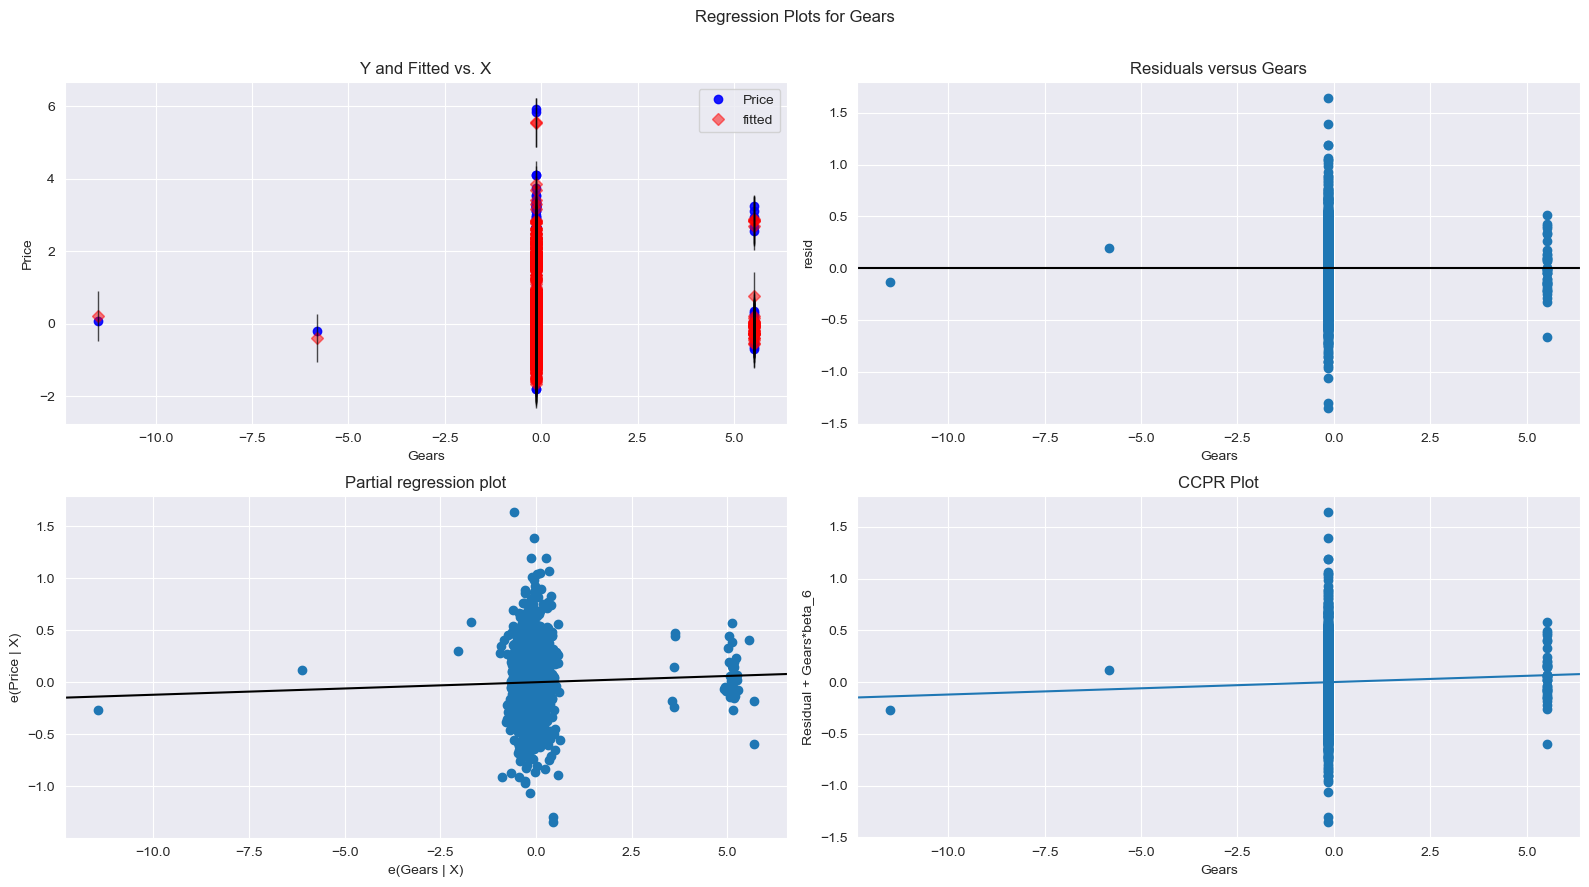

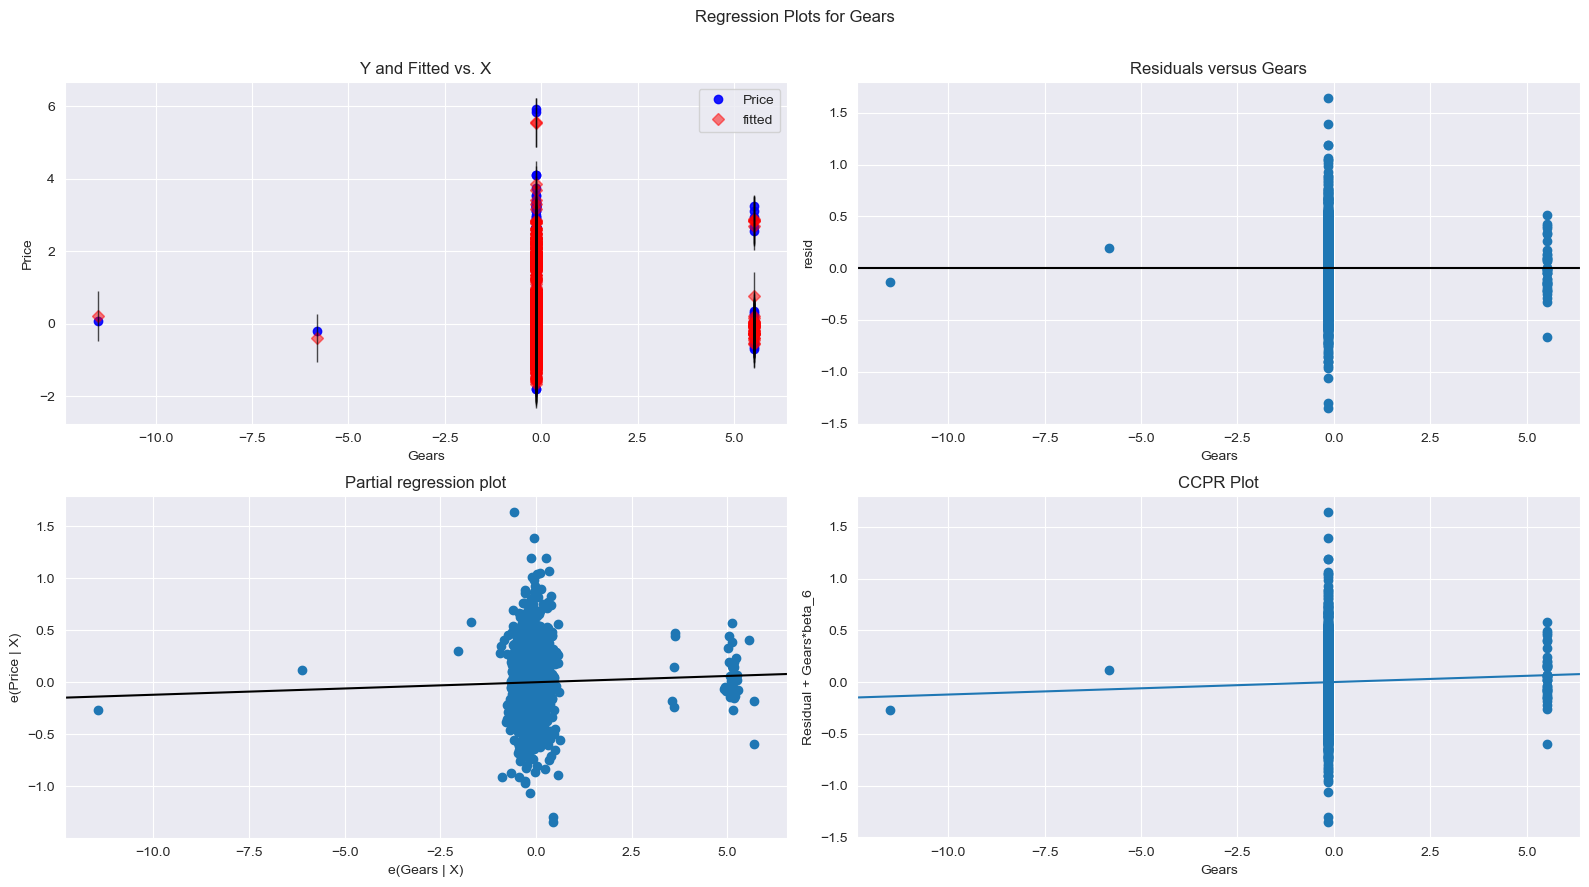

In [1147]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)

### Model Testing
As Y = Beta0 + Beta1(X1) + Beta2(X2) +Beta3(X3) + .................. + Beta n(Xn)

Finding Coefficient Parameters (Beta0 and Beta1's values)
#### Assupmtion for multi linear Regression fails
#### Feature should be independent of each other there should'nt be any dependency upon each other
Here, (Intercept) Beta0 p_value ~ 1
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if(P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)
- Looking at the p-values, it looks like some of the variables aren't really significant (in the presenceof other variables).
- Maybe we could drop some?
- We could simply drop the variable with the highest, non-significant p value. A better way would beto supplement this with the VIF information.

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )

#### This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [1149]:
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'],axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values,i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
6   Weight  3.36
3       CC  2.67
0      Age  2.05
1       KM  1.92
2       HP  1.24
4    Doors  1.23
5    Gears  1.09

In [1151]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)

r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [1153]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

VIF
Variables          
Gears      1.094921
Doors      1.229624
HP         1.243061
KM         1.916381
Age        2.049437
CC         2.669962
Weight     3.360195

### Note: We generally want a VIF that is less than 5. As we can see QT has the highest value among the others, let investigate

In [1155]:
gears_model = smf.ols('Price~Gears',data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.076
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.150
Time:                        11:48:32   Log-Likelihood:                -2012.4
No. Observations:                1419   AIC:                             4029.
Df Residuals:                    1417   BIC:                             4039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.266e-16      0.027   4.77e-15      1.000      -0.052       0.052
Gears          0.0382      0.027      1.441      0.150      -0.014       0.090
==============================================================================
Omnibus:                      439.631   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1211.435
Skew:                           1.612   Prob(JB):                    8.72e-264
Kurtosis:                       6.177   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significance level - Backward elimination
We have different techniques to find out the features which have the maximum effect on the output
Here we are going to look at the backward elimination
In backward elimination we delete the value one by one whose significance level is less
i.e in general we have a P-value and a significane level
P-value = 1 - significane level
or 
p-value + significance level = 1
Hence we will bw deleting features one by one whose p-value is high which means it has less significance level
By eliminating process we get to the values which are the most significance

### Model 1
- Dropping the variable and updating the model

In [1157]:
x = df_standard_scaled.drop(['Gears'],axis=1)
y = df_standard_scaled.drop(['Gears','Price'],axis=1)

In [1159]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'], dtype='object')

In [1161]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1929.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:48:41   Log-Likelihood:                -439.21
No. Observations:                1419   AIC:                             892.4
Df Residuals:                    1412   BIC:                             929.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.112e-17      0.009    8.1e-15      1.000      -0.017       0.017
Age           -0.5807      0.013    -46.223      0.000      -0.605      -0.556
KM            -0.1864      0.012    -15.398      0.000      -0.210      -0.163
HP             0.1122      0.010     11.790      0.000       0.094       0.131
CC            -0.1759      0.014    -12.277      0.000      -0.204      -0.148
Doors         -0.0435      0.010     -4.571      0.000      -0.062      -0.025
Weight         0.4518      0.016     28.162      0.000       0.420       0.483
==============================================================================
Omnibus:                       42.981   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.960
Skew:                           0.203   Prob(JB):                     1.59e-18
Kurtosis:                       4.105   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation: As our Multicollinearity problem has been solved

### PCA
PCA works by finding a low dimensional subspace that maximises the variance of the data in that subspace and performing a linear projection. This basically means the data will be as spread out as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.
#### PCA on Standard Scaled Dataset
#### Explained variance
Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

#### Let's seperate the x and y values

In [1163]:
df_standard_scaled.head()

Price       Age        KM        HP        CC     Doors     Gears  \
0  0.811624 -1.794107 -0.583454 -0.793733  2.339881 -1.082743 -0.148017   
1  0.883384 -1.794107  0.111808 -0.793733  2.339881 -1.082743 -0.148017   
2  0.940792 -1.739971 -0.724778 -0.793733  2.339881 -1.082743 -0.148017   
3  1.227831 -1.631700 -0.556287 -0.793733  2.339881 -1.082743 -0.148017   
4  0.883384 -1.415157 -0.810805 -0.793733  2.339881 -1.082743 -0.148017   

     Weight  
0  2.008917  
1  2.008917  
2  2.008917  
3  2.008917  
4  2.115229

In [1165]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,:1]

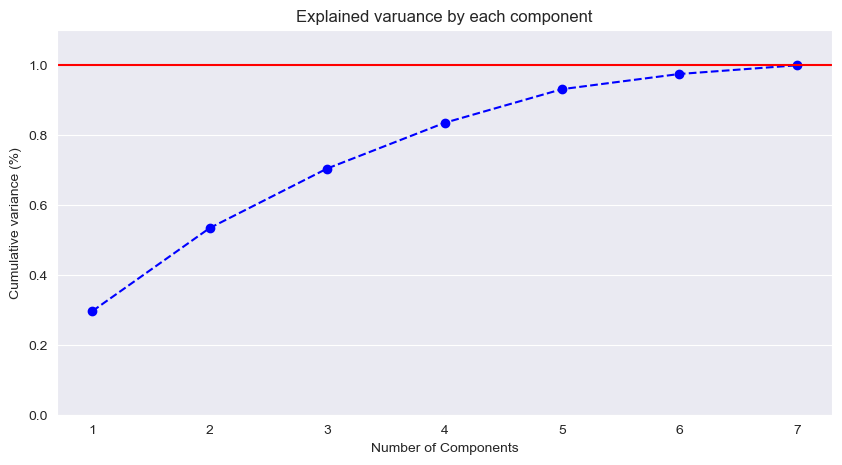

In [1167]:
# PCA 
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1,1+x.shape[1],step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi,marker='o',linestyle='--',color='b')

plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1,1+x.shape[1],step=1))
plt.ylabel('Cumulative variance (%)')
plt.title("Explained varuance by each component")
plt.axhline(y=1,color='r',linestyle='-')
plt.gca().xaxis.grid(False)

In [1169]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var

array([0.29756909, 0.2375073 , 0.16998514, 0.1306    , 0.09618949,
       0.04339178, 0.0247572 ])

Text(0.5, 1.0, 'Explained variance by each component')

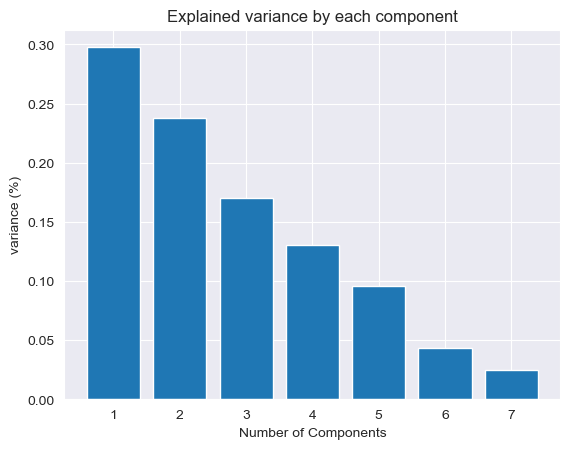

In [1171]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [1173]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 29.76,  53.51,  70.51,  83.57,  93.19,  97.53, 100.01])

#### As we can see just by 5 features we get a variance of more than 90%

In [1176]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to Dataframe

pca_std_df = pd.DataFrame(data=pca_std,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(1419, 7)


PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  2.768440  0.742791  0.349956 -2.388664 -0.739961 -0.442651 -0.326521
1  2.654986  1.214834  0.429521 -2.293948 -0.719826  0.036201 -0.274684
2  2.765584  0.665936  0.339352 -2.384505 -0.751344 -0.571891 -0.321434
3  2.686255  0.818522  0.369772 -2.314728 -0.761045 -0.519657 -0.277625
4  2.690623  0.744127  0.366896 -2.269377 -0.796293 -0.834961 -0.156406

In [1178]:
dataframe.Price

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1414     8450
1415     7500
1416    10845
1417     8500
1418     7250
Name: Price, Length: 1419, dtype: int64

In [1180]:
pca_std_df['Price'] = y
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.768440  0.742791  0.349956 -2.388664 -0.739961 -0.442651 -0.326521   
1  2.654986  1.214834  0.429521 -2.293948 -0.719826  0.036201 -0.274684   
2  2.765584  0.665936  0.339352 -2.384505 -0.751344 -0.571891 -0.321434   
3  2.686255  0.818522  0.369772 -2.314728 -0.761045 -0.519657 -0.277625   
4  2.690623  0.744127  0.366896 -2.269377 -0.796293 -0.834961 -0.156406   

      Price  
0  0.811624  
1  0.883384  
2  0.940792  
3  1.227831  
4  0.883384

In [1182]:
pca_model= smf.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:49:03   Log-Likelihood:                -438.35
No. Observations:                1419   AIC:                             892.7
Df Residuals:                    1411   BIC:                             934.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.112e-17      0.009   8.11e-15      1.000      -0.017       0.017
PC1            0.5179      0.006     85.203      0.000       0.506       0.530
PC2           -0.3649      0.007    -53.631      0.000      -0.378      -0.352
PC3           -0.0358      0.008     -4.447      0.000      -0.052      -0.020
PC4           -0.2902      0.009    -31.628      0.000      -0.308      -0.272
PC5            0.0648      0.011      6.060      0.000       0.044       0.086
PC6            0.2418      0.016     15.192      0.000       0.211       0.273
PC7            0.2647      0.021     12.560      0.000       0.223       0.306
==============================================================================
Omnibus:                       44.052   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.397
Skew:                           0.208   Prob(JB):                     4.71e-19
Kurtosis:                       4.120   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1184]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.8913962001227942
R2_Adjusted_score :  0.8908574144394913
RMSE :  1148.104551983646


In [1186]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  Price
0  2.768440  0.742791  0.349956 -2.388664 -0.739961 -0.442651 -0.326521  13500
1  2.654986  1.214834  0.429521 -2.293948 -0.719826  0.036201 -0.274684  13750
2  2.765584  0.665936  0.339352 -2.384505 -0.751344 -0.571891 -0.321434  13950
3  2.686255  0.818522  0.369772 -2.314728 -0.761045 -0.519657 -0.277625  14950
4  2.690623  0.744127  0.366896 -2.269377 -0.796293 -0.834961 -0.156406  13750

In [1188]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((993, 7), (426, 7), (993,), (426,))

In [1190]:
# Scaling

transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1))
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

# Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train,y_train_scal)

LinearRegression()

In [1192]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.8999177810728949
R2_score (train):  0.9030486264943298
R2_score (test):  0.8499392131547943
RMSE using all features:  1187.3325524845538


### Forward Selection
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

I will demonstrate the Step Forward feature selection algorithm from mlxtend using the House Price dataset.

In [1195]:
X = dataframe.drop('Price',axis=1)
Y = dataframe[['Price']]

In [1197]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [1199]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((993, 7), (426, 7), (993, 1), (426, 1))

In [1201]:
# step forward feature selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(),
          k_features = 4,
           forward = True,
           floating = False,
           verbose = 2,
           scoring = 'r2',
           cv=3
          )
sfs1 = sfs1.fit(np.array(x_train),y_train)


[2025-04-02 11:49:25] Features: 1/4 -- score: 0.8522417035455412
[2025-04-02 11:49:31] Features: 2/4 -- score: 0.8727528449533892
[2025-04-02 11:49:35] Features: 3/4 -- score: 0.8876517255438294
[2025-04-02 11:49:39] Features: 4/4 -- score: 0.904339476812833

In [1203]:
sfs1.k_feature_idx_

(0, 1, 2, 6)

In [1205]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'HP', 'Weight'], dtype='object')

#### Observation : From above we can say that these 4 features are enough to get a higher R-squared value
### Regularization
You have your model ready, you have predicted your output. So why do you need to study regularization? Is it necessary?

Suppose you have taken part in a competition, and in that problem you need to predict a continuous variable. So you applied linear regression and predicted your output.You are on the leaderboard. But wait what you see is still there are many people above you on the leaderboard. But you did everything right then how is it possible?

“Everything should be made simple as possible, but not simpler – Albert Einstein”

What we did was simpler, everybody else did that, now let us look at making it simple. That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.

In [1208]:
# checking the magnitude of coefficients

f = 'Price ~ Age + KM + HP + CC + Doors + Weight  + Gears'
reg_results = smf.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                       'err' : err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

         coef         err varname
0 -109.524293    4.646643     Age
1   -0.017522    0.002224      KM
2   26.823123    4.710679      HP
3   -3.278300    0.526581      CC
4 -149.315035   69.821351   Doors
5   33.355898    2.336849  Weight
6  238.170135  356.140298   Gears


<Axes: title={'center': 'Coefficients'}, xlabel='varname'>

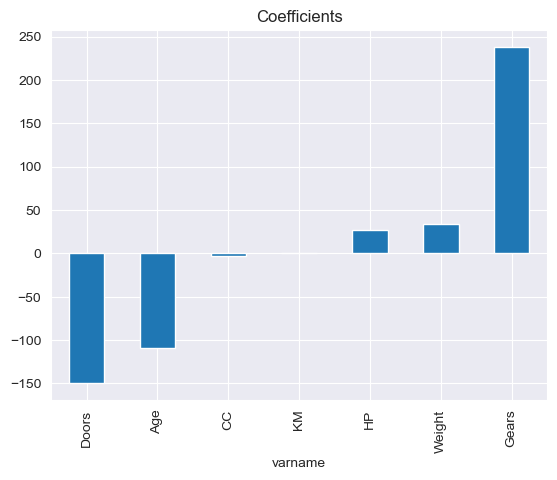

In [1210]:
#checking the magnitude of coefficients

coef = pd.Series(data=coef_df.coef.values,index= coef_df.varname).sort_values()
coef.plot(kind='bar',title = 'Coefficients')

#### We can see that coefficients of Gears(last 1) is much higher as compared to rest of the coefficients. Therefore the total Price would be more driven by this feature.

#### How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem. So let us discuss them.
### Ridge Regression
#### Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

In [1213]:
from sklearn.linear_model import Ridge

## Normalize the features
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

## training the model

ridgeReg = Ridge(alpha=0.05)

ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05)

- Note that value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

In [1216]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8999178900638238
R2_score (train):  0.9030486262432171
R2_score (test):  0.8499389914618017
RMSE:  1187.3334295398288


In [1218]:
ridgeReg.coef_.flatten()

array([-1.10417721e+02, -1.98293562e-02,  2.65861171e+01, -3.00470837e+00,
       -1.50759112e+02,  1.99811883e+02,  3.26130956e+01])

In [1220]:
coef_df = pd.DataFrame({'coef':ridgeReg.coef_.flatten(),
                       'varname':dataframe.columns.values[1:]})
print(coef_df)

         coef varname
0 -110.417721     Age
1   -0.019829      KM
2   26.586117      HP
3   -3.004708      CC
4 -150.759112   Doors
5  199.811883   Gears
6   32.613096  Weight


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

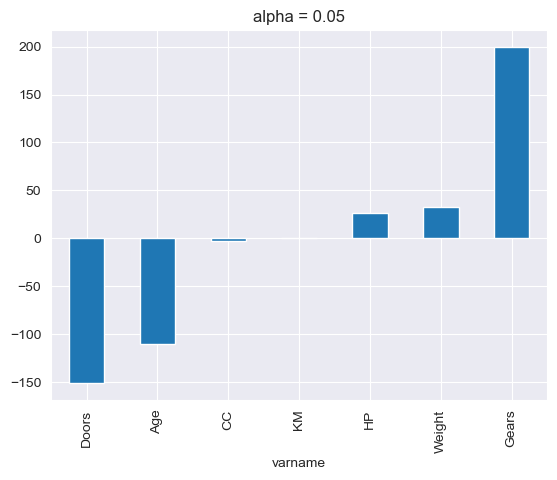

In [1222]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

In [1224]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('model',Ridge(alpha=0.5,fit_intercept=True))
]
ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [1226]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator=ridge_pipe, X = x_train, y = y_train, cv=10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train,y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test,y_pred_ridge_test)

# Predicting RMSE the Test set results

rmse_ridge = (np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))
print('CV: ',cv_ridge.mean())
print('R2_score (train): ',r2_score_ridge_train)
print('R2_score (test): ',r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.9012120858727906
R2_score (train):  0.9218388637521264
R2_score (test):  0.8664915974417432
RMSE:  1119.9356383701788


In [1228]:
# here, again I will train a Ridge Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Ridge"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

from sklearn.feature_selection import SelectFromModel

sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

total features: 7
selected features: 3
Index(['Age', 'Doors', 'Gears'], dtype='object')


#### Important Points:
- It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

- It reduces the model complexity by coefficient shrinkage.

- It uses L2 regularization technique.

#### Now let us consider another type of regression technique which also makes use of regularization

### LASSO Regression
Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [1231]:
from sklearn.linear_model import Lasso

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lassoReg = Lasso(alpha=0.5)
lassoReg.fit(x_train_scaled,y_train)
pred = lassoReg.predict(x_test_scaled)

In [1233]:
# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train_scaled)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test_scaled)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.8999139464985276
R2_score (train):  0.9030484027925315
R2_score (test):  0.8499421998711335
RMSE:  1187.3207364623438


In [1235]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [1237]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.9083954611534132
R2_score (train):  0.9217240734049533
R2_score (test):  0.8688730686538719
RMSE:  1109.902204685908


In [1239]:
sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [1241]:
sel_lasso.get_support()

array([ True,  True,  True,  True,  True, False,  True])

In [1243]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 7
selected features: 6
features with coefficients shrank to zero: 1


In [1245]:
x_train.columns[(sel_lasso.get_support())]

Index(['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'], dtype='object')

#### Let's compare the residuals of all the models to come up with an conclusion
#### Model Validation
#### Comparing different models with respect to their Root Mean Squared Errors
#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [1252]:
x = dataframe[['Age','KM','HP','CC','Doors','Weight']]
y = dataframe[['Price']]

transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)

# Scale the dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.8912637379275729
R2_Adjusted_score :  0.8908016858224492
RMSE :  1148.8045003521631


In [1254]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','CC','Doors']]))

In [1256]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [1258]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 1345.405029869193 
After Removing Influencers= 1151.3546775290008 
After Log Transformation on both Model= 2060.755660892152 
After Cube-root Transformation on both Model= 1317.9720374495862 
After Sqaure Root Transformation on both Model= 1154.2125441898963 
After Removing Influencers from model 1151.3546775290008 
Final Model without Multicollinearity Model= 1148.8045003521631


### Let's compare the Root Mean Squared Error and check for the minimum value

In [1261]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

#### Observation: The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.
- Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared

In [1267]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Weight", data=df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:50:58   Log-Likelihood:                -438.35
No. Observations:                1419   AIC:                             892.7
Df Residuals:                    1411   BIC:                             934.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.112e-17      0.009   8.11e-15      1.000      -0.017       0.017
Age           -0.5807      0.013    -46.237      0.000      -0.605      -0.556
KM            -0.1877      0.012    -15.457      0.000      -0.212      -0.164
HP             0.1093      0.010     11.170      0.000       0.090       0.128
CC            -0.1751      0.014    -12.212      0.000      -0.203      -0.147
Doors         -0.0408      0.010     -4.195      0.000      -0.060      -0.022
Gears          0.0120      0.009      1.312      0.190      -0.006       0.030
Weight         0.4503      0.016     28.000      0.000       0.419       0.482
==============================================================================
Omnibus:                       44.052   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.397
Skew:                           0.208   Prob(JB):                     4.71e-19
Kurtosis:                       4.120   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual Analysis
- Test for Normality of Residuals (Q-Q Plot)

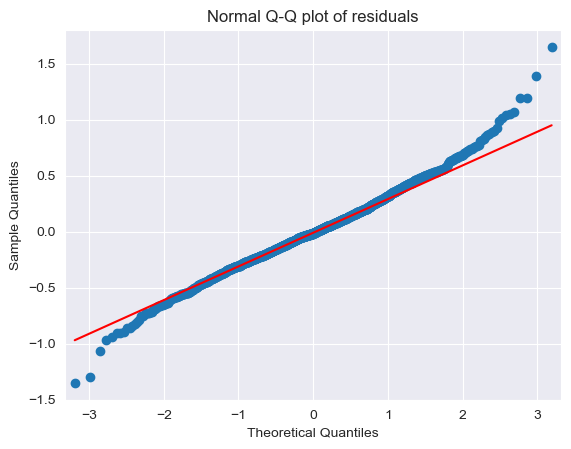

In [1270]:
#Residuals values  = y - yhat
sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
#### Residual Plot for Homoscedasticity

In [1273]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

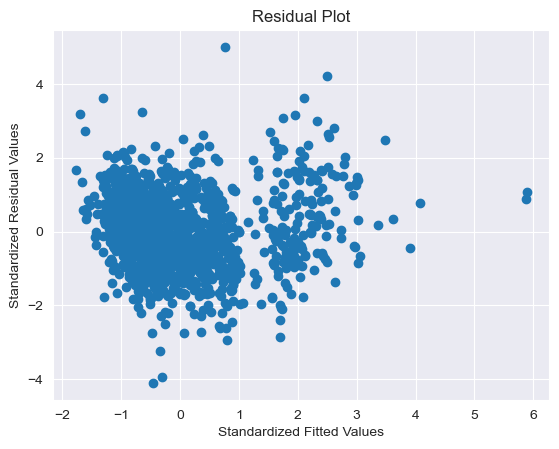

In [1275]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### Observation: Constant Variance (Homoscedasticity) in Error
#### Residual VS Regressors
- Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

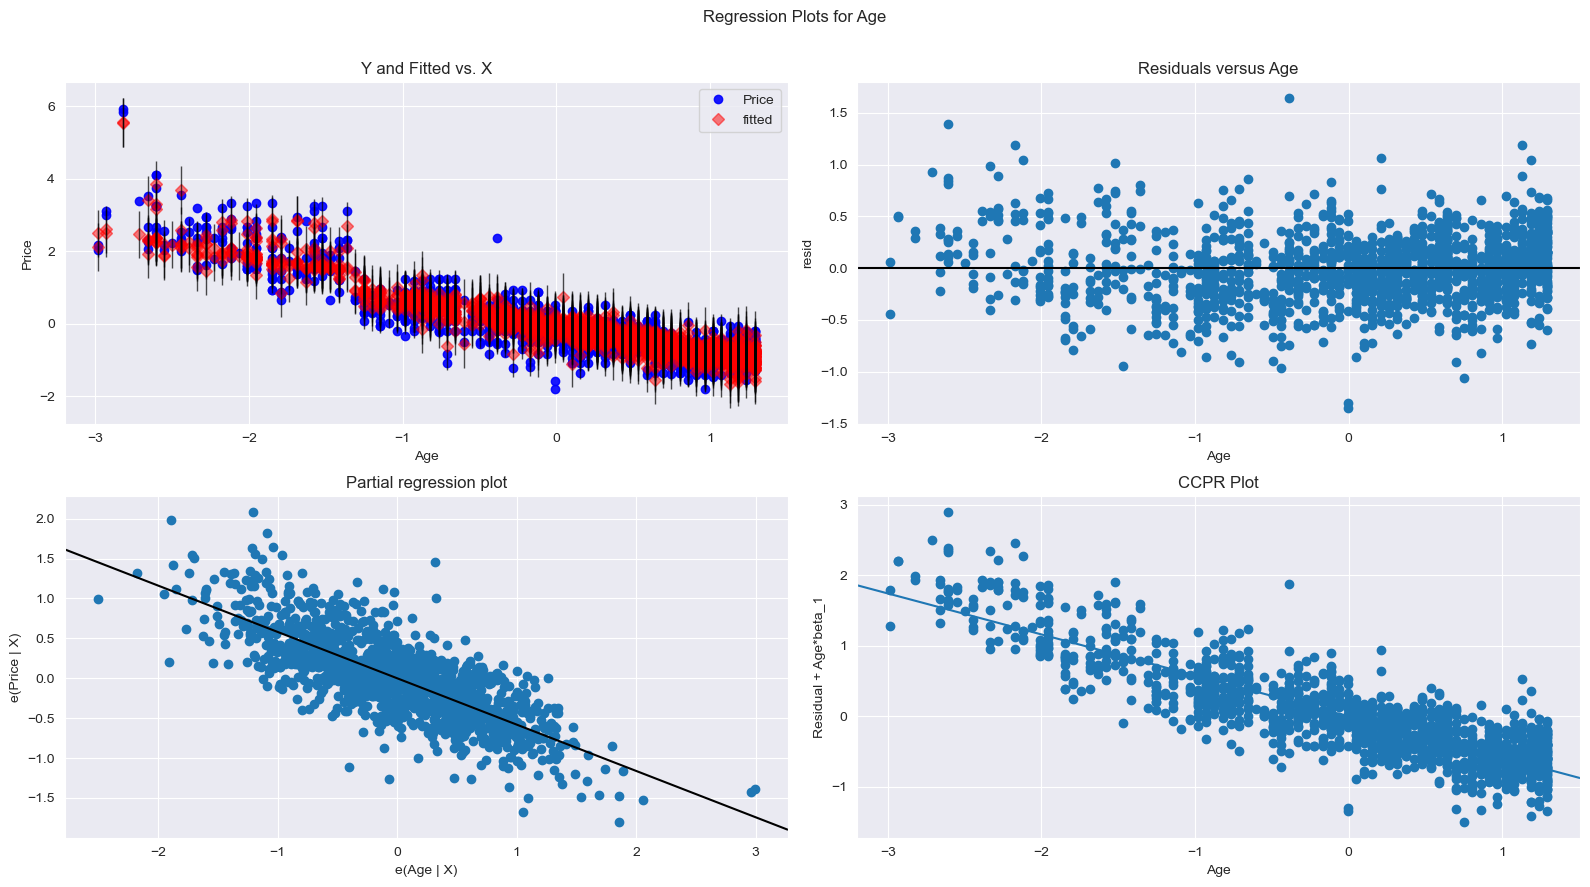

In [1278]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

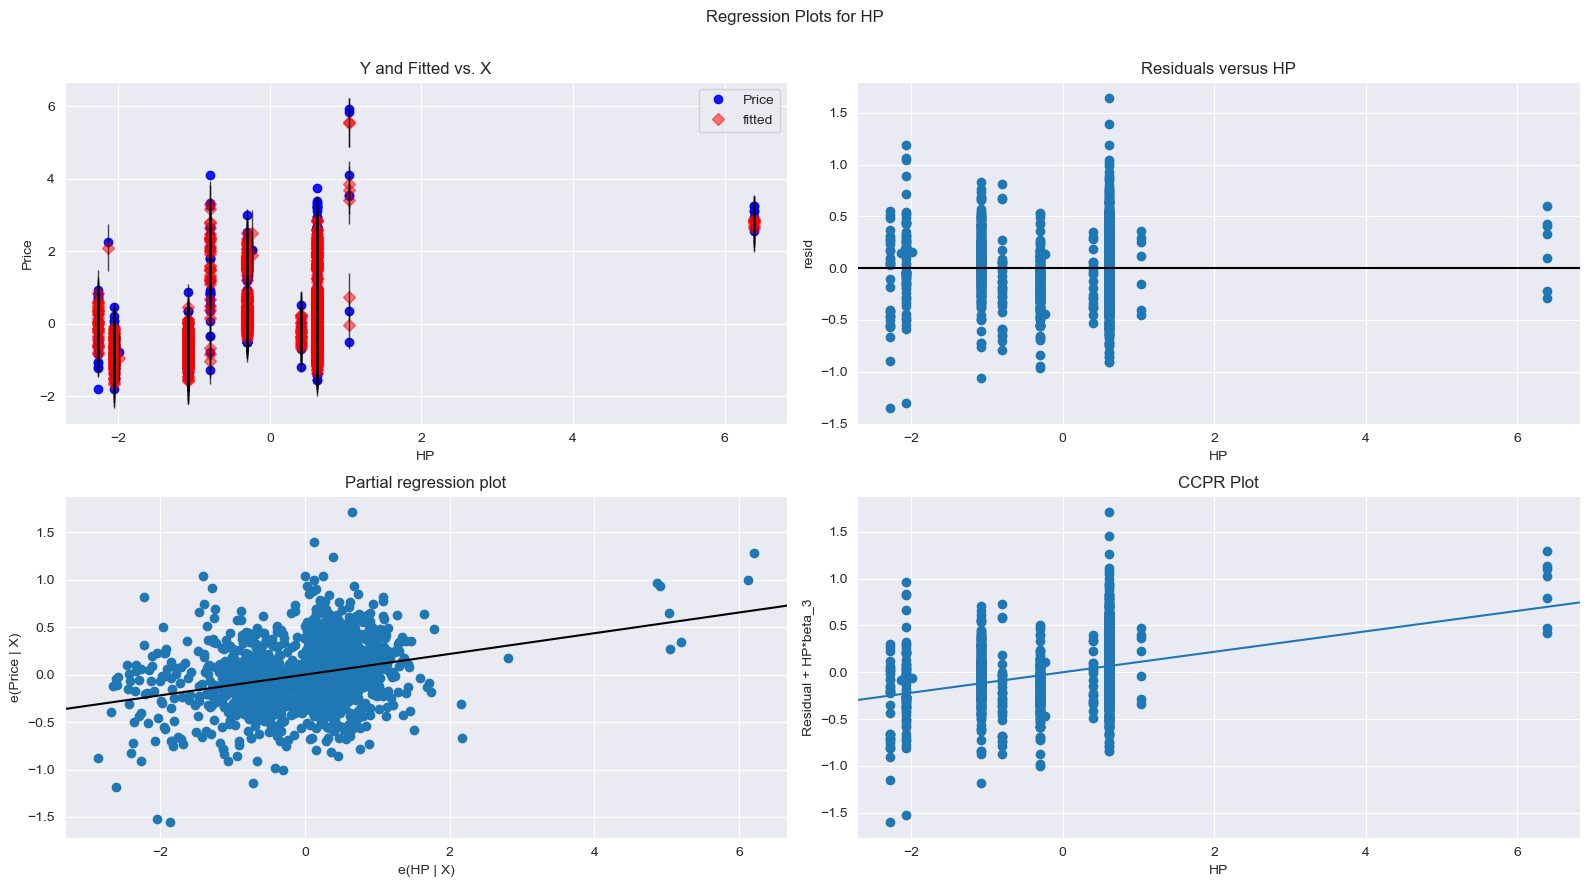

In [1279]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

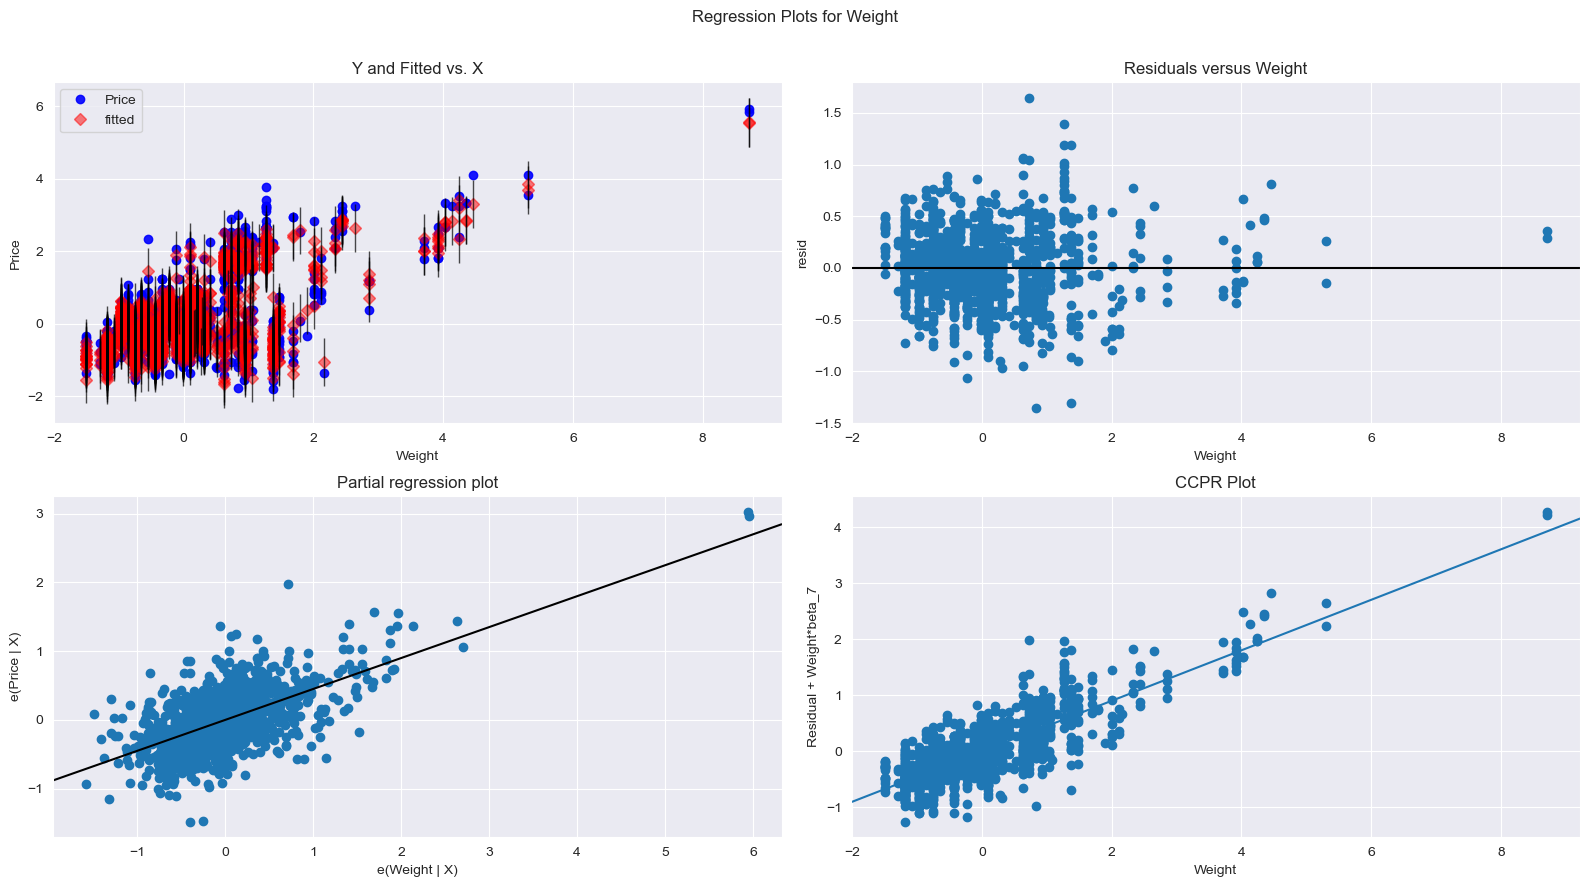

In [1281]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

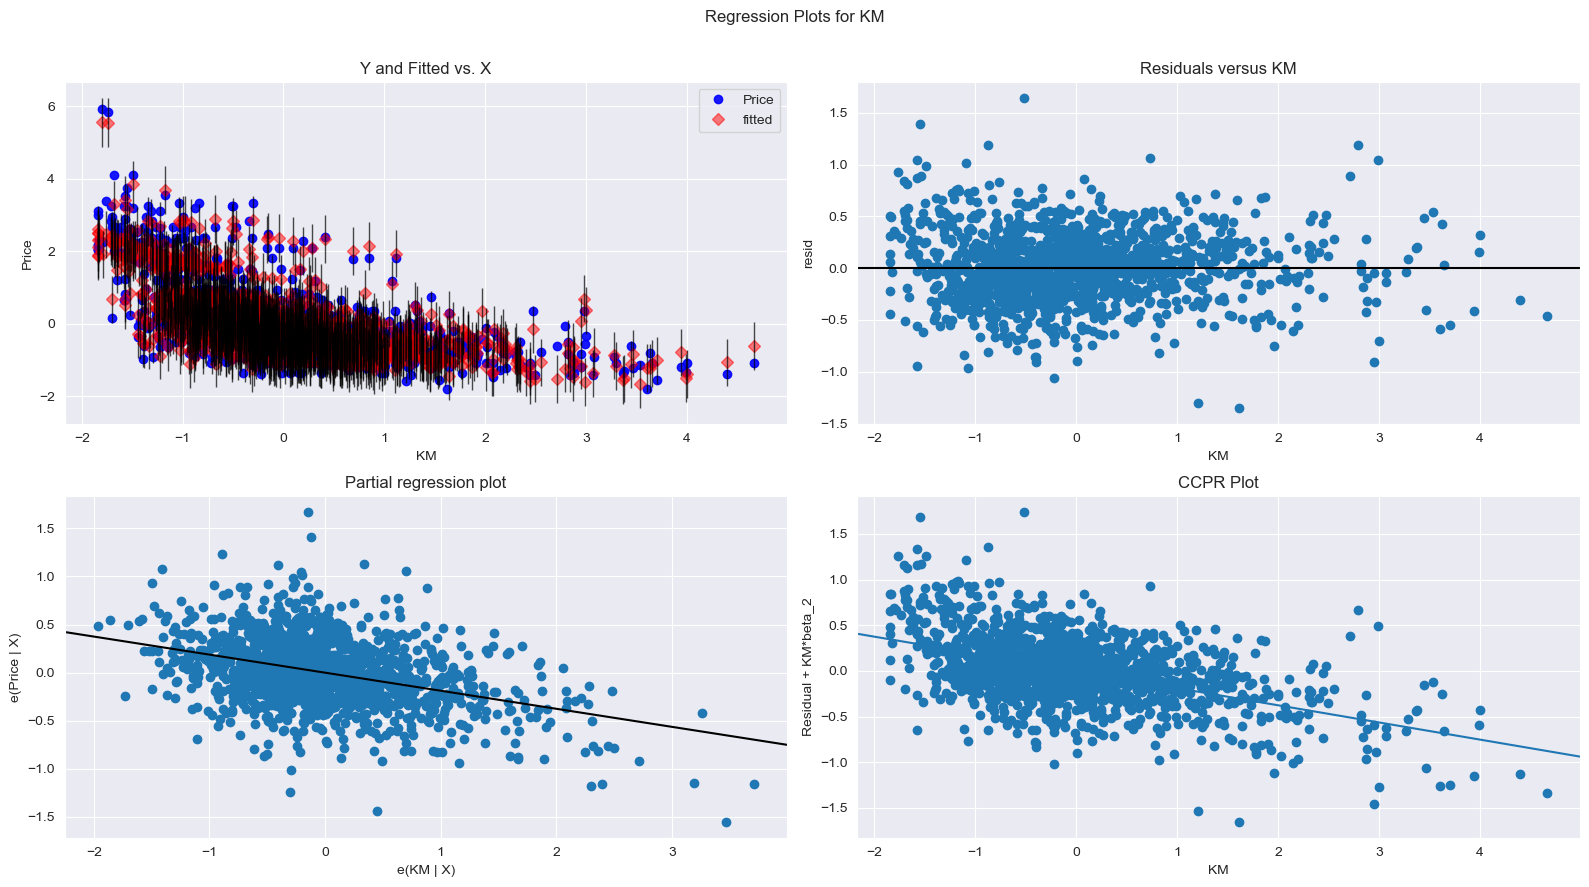

In [1283]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

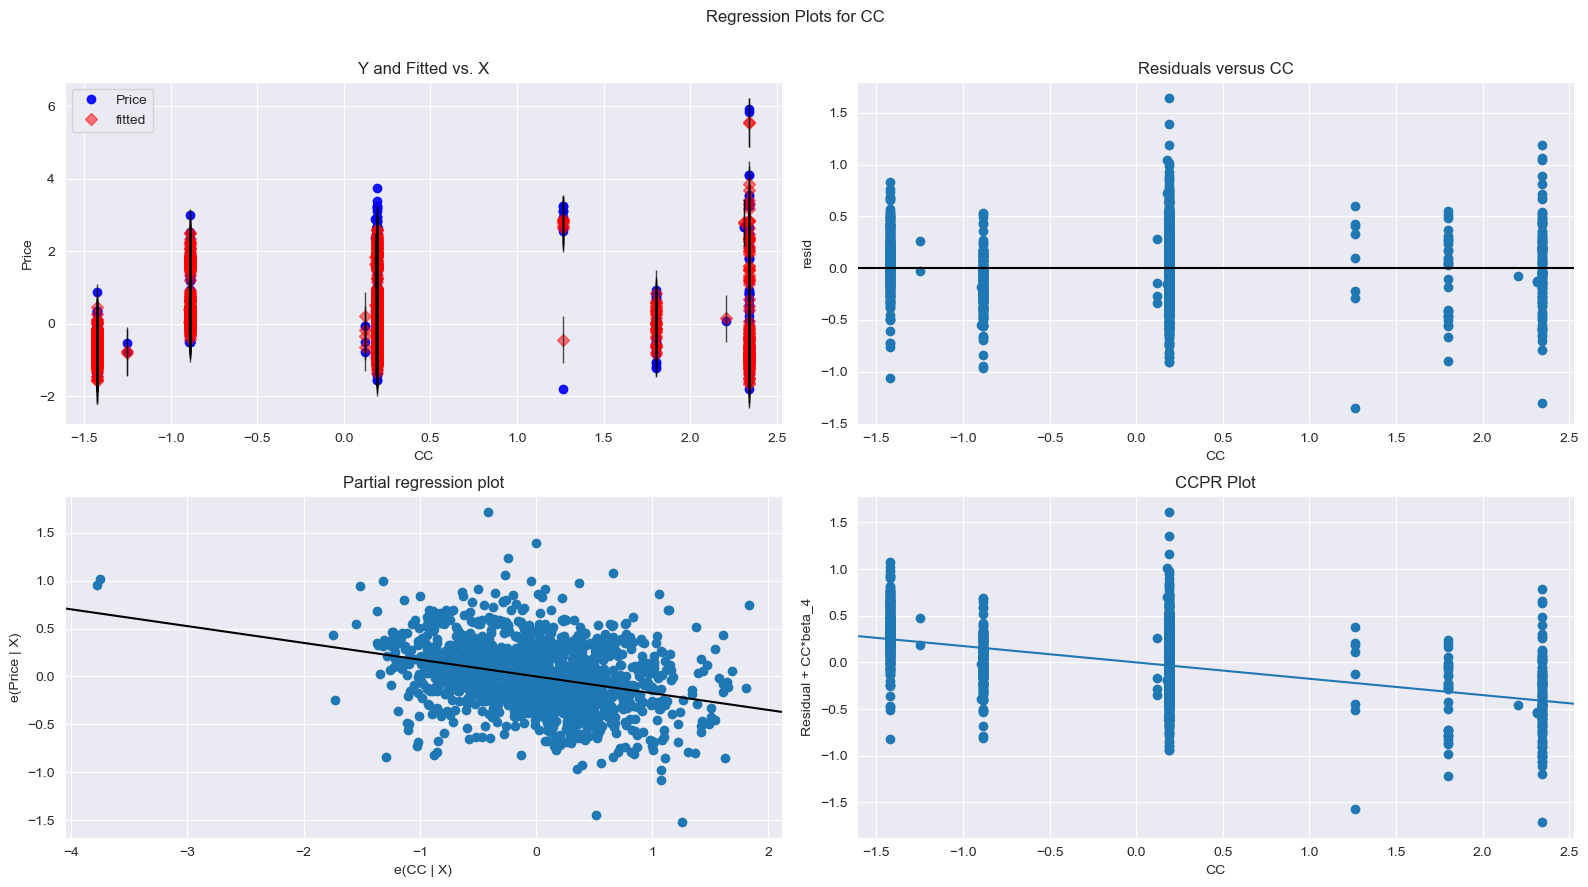

In [1284]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

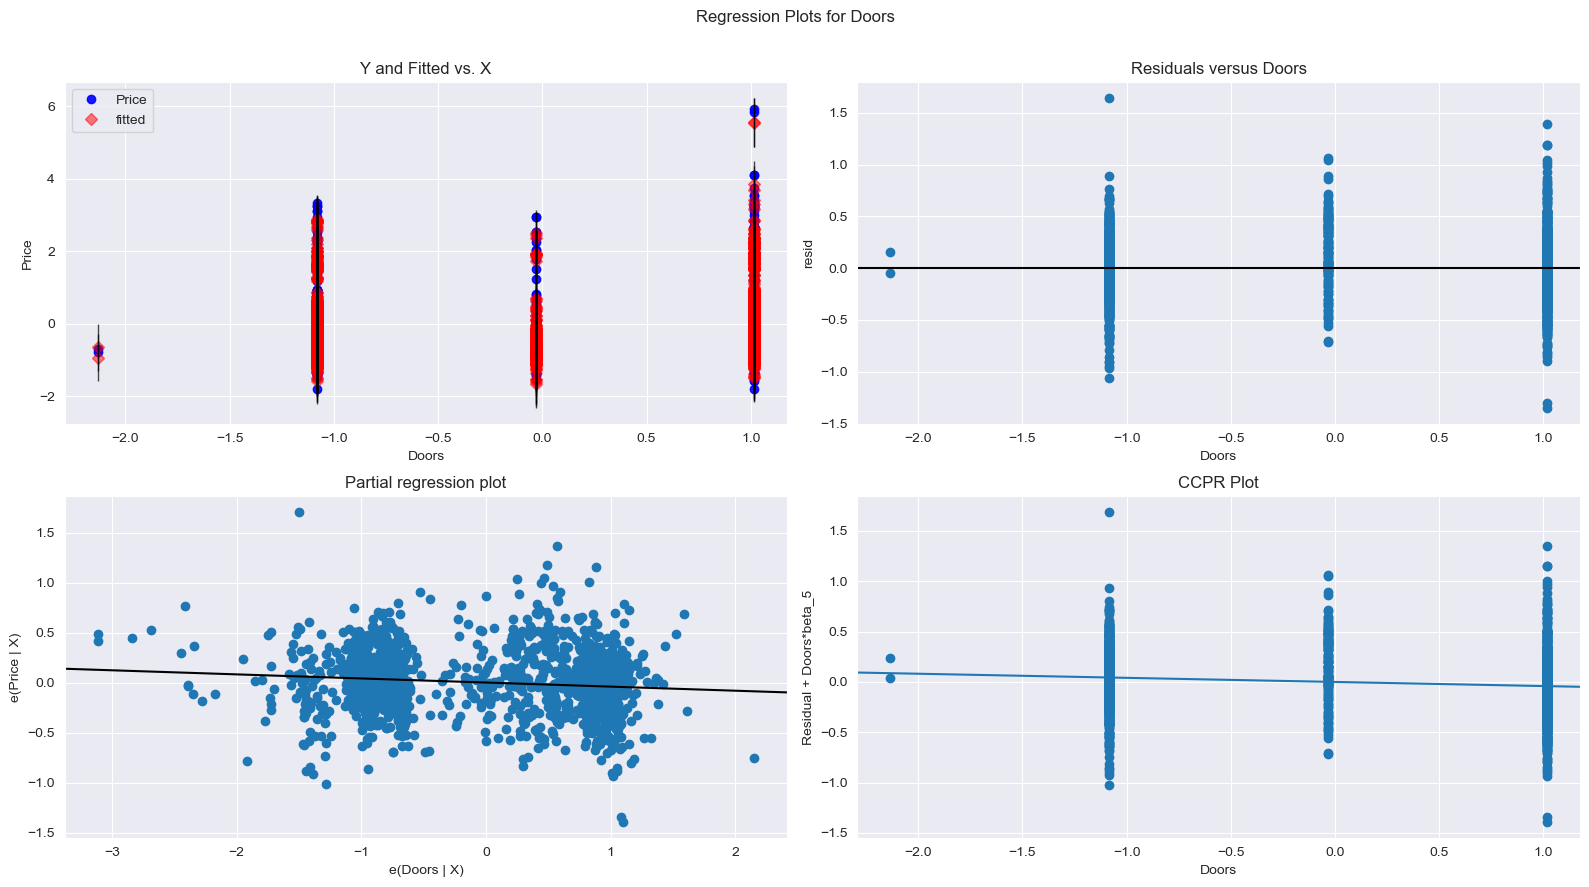

In [1286]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

#### Observation:
- Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, QT, CC, Doors, Weight and HP
- Only KM and Age is having a linear relation with the Price Feature
#### Predicting values from Model using same dataset

In [1291]:
x = dataframe[['Age','KM','HP','CC','Doors','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)


# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(df_standard_scaled))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[16253.78245238],
       [15799.0605258 ],
       [16236.68843765],
       ...,
       [ 8561.60464974],
       [ 8705.89324137],
       [ 8817.16976757]])

In [1293]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

1148.1045519836457

In [1297]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC

predicted['Doors'] = dataframe.Doors
predicted

Predicted_Price  Price  Age     KM  Weight  HP    CC  Doors
0        16253.782452  13500   23  46986    1165  90  2000      3
1        15799.060526  13750   23  72937    1165  90  2000      3
2        16236.688438  13950   24  41711    1165  90  2000      3
3        15907.441932  14950   26  48000    1165  90  2000      3
4        15802.586364  13750   30  38500    1170  90  2000      3
...               ...    ...  ...    ...     ...  ..   ...    ...
1414      7615.320991   8450   80  23000    1015  86  1300      3
1415      9196.682041   7500   69  20544    1025  86  1300      3
1416      8561.604650  10845   72  19000    1015  86  1300      3
1417      8705.893241   8500   71  17016    1015  86  1300      3
1418      8817.169768   7250   70  16916    1015  86  1300      3

[1419 rows x 8 columns]

### Preparing a table containing R2 value for each prepared model

In [1300]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data_Model   0.861684            0.861006   
1                   After_Removing_Influencers   0.891396            0.890857   
2               After_Log Transformation_Model   0.757505            0.756474   
3         After_Cube-root_Transformation_Model   0.850695            0.850061   
4       After_Sqaure_Root_Transformation_Model   0.876388            0.875775   
5  Final_Model_without_Multicollinearity_Model   0.891264            0.890802   

          RMSE  
0  1345.405030  
1  1151.354678  
2  2060.755661  
3  1317.972037  
4  1154.212544  
5  1148.804500

### Visualizing Models Performance

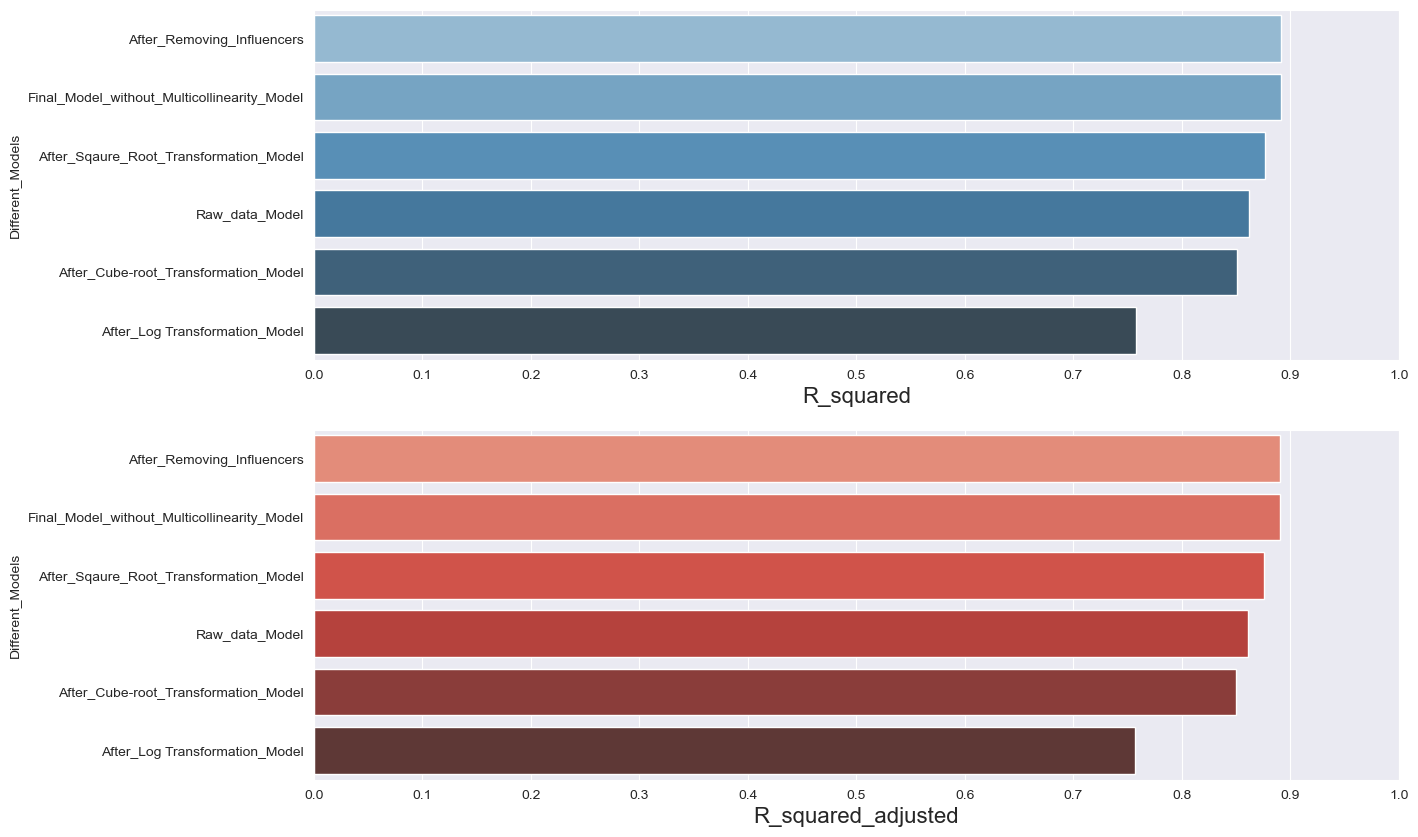

In [1303]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

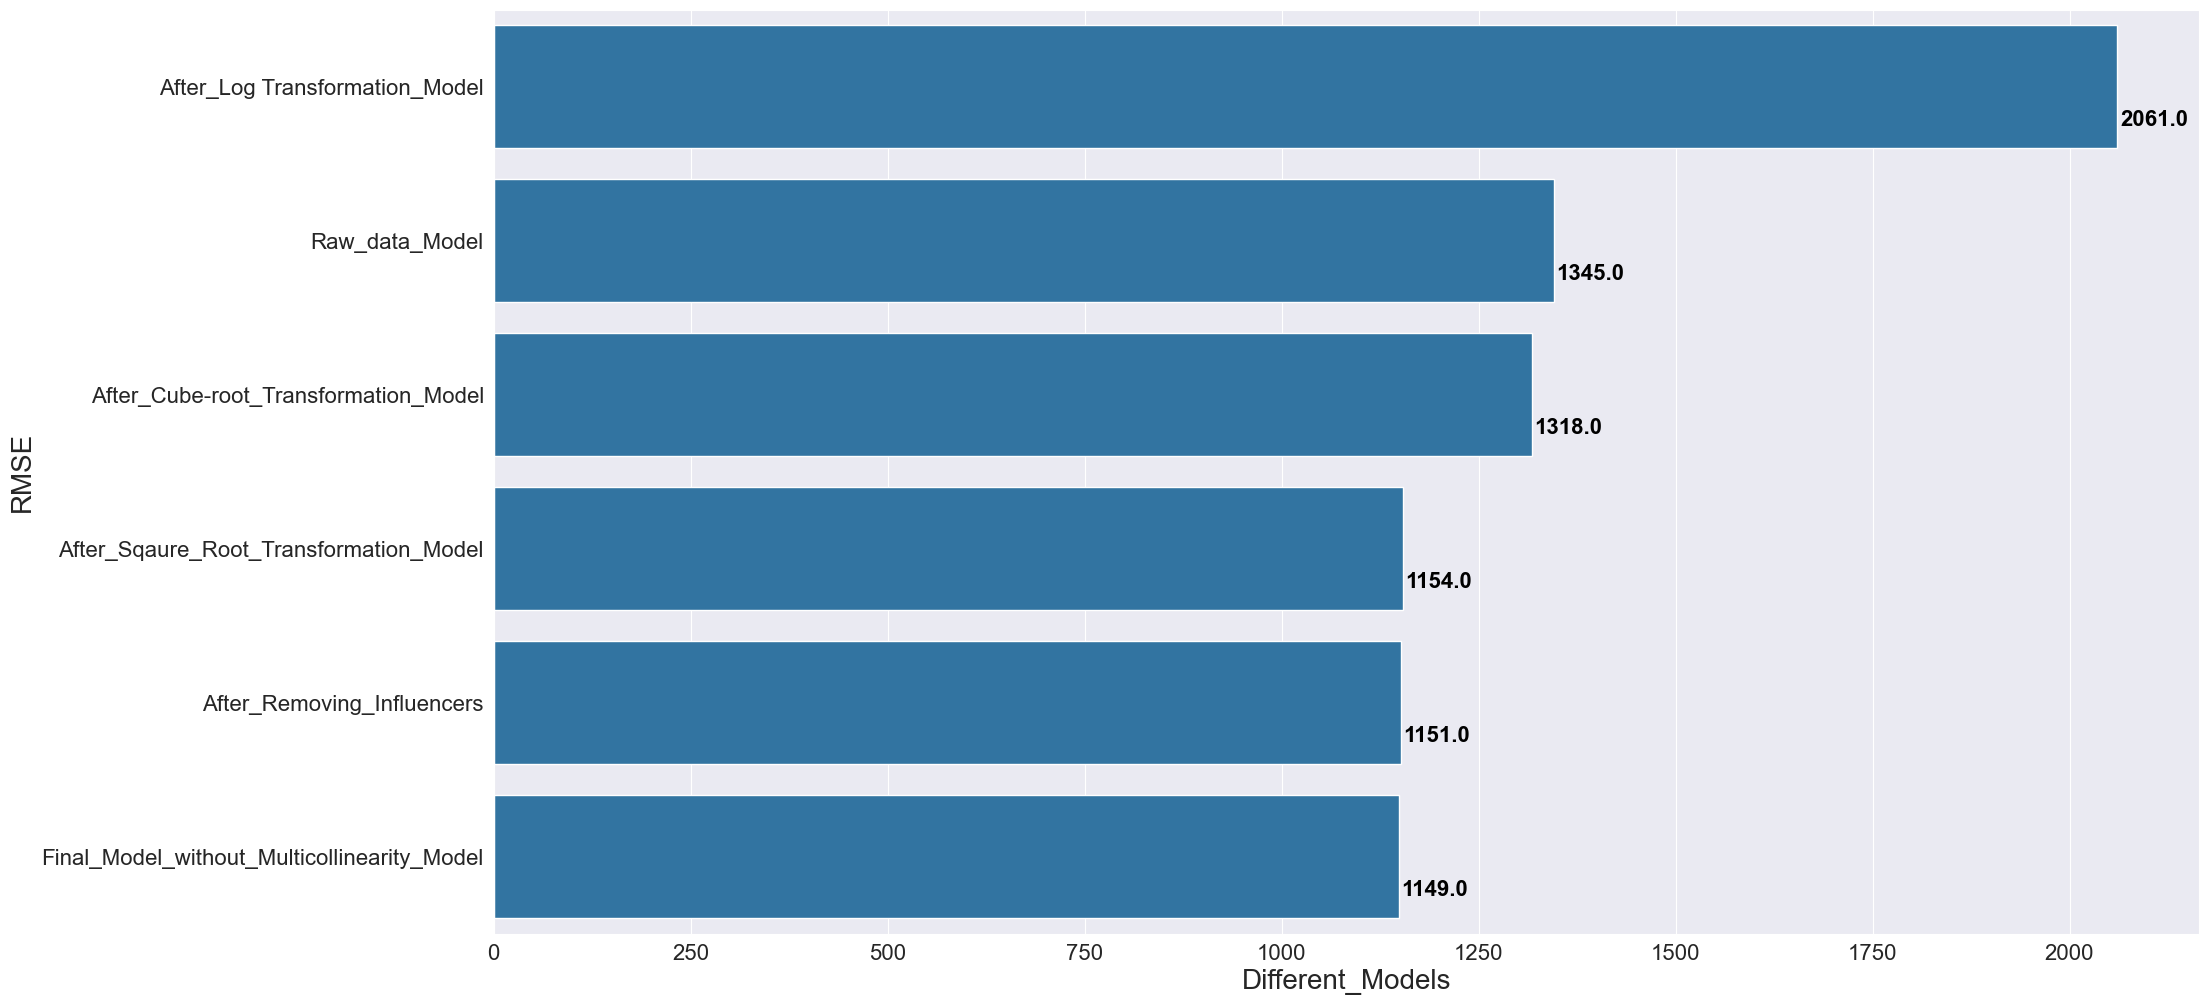

In [1305]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

### Interview Questions:
#### 1.What is Normalization & Standardization and how is it helpful?


Normalization vs. Standardization
Both Normalization and Standardization are feature scaling techniques used to improve the performance of machine learning models, especially those sensitive to feature magnitudes (e.g., KNN, SVM, Logistic Regression).

Key Differences

Normalization → Rescales data between 0 and 1. Best for distance-based models.

Standardization → Centers data with mean 0 and variance 1. Best for normally distributed data.

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?

Techniques to Fix Multicollinearity
1. Remove Highly Correlated Predictors
Drop one of the correlated variables to reduce redundancy.

2. Principal Component Analysis (PCA)
Transforms correlated variables into independent components.

3. Use Regularization (Lasso or Ridge Regression)
Ridge Regression (L2 Regularization) shrinks coefficients but keeps all features.

Lasso Regression (L1 Regularization) can eliminate some features entirely.

4. Combine or Create New Features
Feature Engineering: Convert correlated variables into a single meaningful feature.

5. Increase Sample Size
More data can help the model distinguish between similar variables.